#**Özet**

Bu çalışma, Our World in Data COVID-19 veri seti kullanılarak dünya genelinde, kıtalar düzeyinde ve Türkiye özelinde COVID-19 pandemisinin seyri üzerine veri odaklı bir analiz sunmaktadır. Milyon kişi başına düşen vaka ve ölüm oranları, aşılama trendleri ve demografik değişkenlerle olan ilişkiler incelenmiştir.

Zaman serisi, dağılım ve karşılaştırmalı grafiklerle desteklenen analizler sonucunda, yüksek aşılama oranlarının özellikle ölüm oranlarını düşürmede etkili olduğu görülmüştür. Türkiye’nin aşılama süreci, vaka artışları ve ölüm oranları ışığında değerlendirilmiş, yaşlı nüfus oranı gibi değişkenlerle ilişkileri ortaya konmuştur.

Bu analiz, pandemiye karşı alınan önlemlerin etkisini daha iyi anlamak, halk sağlığı politikalarını değerlendirmek ve veri görselleştirmeleriyle karar alıcılara sezgisel bilgiler sunmak amacıyla hazırlanmıştır.

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"deryasakoztorun","key":"332adefd4a300676d7aa7d91c0935142"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)

In [86]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [77]:
df.shape

(429435, 42)

#**Eksik Değer Analizi**

In [87]:
from IPython.display import display

null_count = df.isnull().sum()
null_rate = df.isnull().mean()

missing_values_df = pd.DataFrame({
    'Eksik Değer Sayısı': null_count,
    'Eksik Değer Yüzdesi': (null_rate * 100).round(2)
}).sort_values(by='Eksik Değer Yüzdesi', ascending=False)

display(missing_values_df)

,Eksik Değer Sayısı,Eksik Değer Yüzdesi
weekly_icu_admissions,418442,97.44
weekly_icu_admissions_per_million,418442,97.44
excess_mortality,416024,96.88
excess_mortality_cumulative_absolute,416024,96.88
excess_mortality_cumulative,416024,96.88
...,...,...
total_cases_per_million,17631,4.11
location,0,0.00
iso_code,0,0.00
date,0,0.00


###Veri setiyle sağlıklı bir analiz yapabilmek amacıyla, %80'dan fazla eksik değer barındıran sütunlar silinmelidir:

In [88]:
cols_to_drop = df.isnull().mean()[df.isnull().mean() > 0.80].index

df.drop(columns=cols_to_drop, inplace=True)

print(f"Kalan sütun sayısı: {df.shape[1]}")

Kalan sütun sayısı: 42


In [89]:
from IPython.display import display

null_count = df.isnull().sum()
null_rate = df.isnull().mean()

missing_values_df = pd.DataFrame({
    'Eksik Değer Sayısı': null_count,
    'Eksik Değer Yüzdesi': (null_rate * 100).round(2)
}).sort_values(by='Eksik Değer Yüzdesi', ascending=False)

display(missing_values_df)

,Eksik Değer Sayısı,Eksik Değer Yüzdesi
tests_per_case,335087,78.03
positive_rate,333508,77.66
new_tests_smoothed_per_thousand,325470,75.79
new_tests_smoothed,325470,75.79
tests_units,322647,75.13
handwashing_facilities,267694,62.34
reproduction_rate,244618,56.96
new_people_vaccinated_smoothed,237258,55.25
new_people_vaccinated_smoothed_per_hundred,237258,55.25
new_vaccinations_smoothed_per_million,234406,54.58


#**Aykırı Değer Analizi**

###Değişkenlerin önce istatistiki değerleri, ardından aykırı değer sayı ve oranları incelenmiştir.

In [90]:
df.describe().T.round(2).applymap(lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

/tmp/ipython-input-90-1271910641.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.describe().T.round(2).applymap(lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))


,count,mean,std,min,25%,50%,75%,max
total_cases,"411.804,00","7.365.292,35","44.775.816,77","0,00","6.280,75","63.653,00","758.272,00","775.866.783,00"
new_cases,"410.159,00","8.017,36","229.664,87","0,00","0,00","0,00","0,00","44.236.227,00"
new_cases_smoothed,"408.929,00","8.041,03","86.616,11","0,00","0,00","12,00","313,29","6.319.461,00"
total_deaths,"411.804,00","81.259,57","441.190,14","0,00","43,00","799,00","9.574,00","7.057.132,00"
new_deaths,"410.608,00","71,85","1.368,32","0,00","0,00","0,00","0,00","103.719,00"
new_deaths_smoothed,"409.378,00","72,06","513,64","0,00","0,00","0,00","3,14","14.817,00"
total_cases_per_million,"411.804,00","112.096,20","162.240,41","0,00","1.916,10","29.145,48","156.770,19","763.598,60"
new_cases_per_million,"410.159,00","122,36","1.508,78","0,00","0,00","0,00","0,00","241.758,23"
new_cases_smoothed_per_million,"408.929,00","122,71","559,70","0,00","0,00","2,79","56,25","34.536,89"
total_deaths_per_million,"411.804,00","835,51","1.134,93","0,00","24,57","295,09","1.283,82","6.601,11"


In [92]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

outlier_df = pd.DataFrame(columns=["Aykırı Değer Sayısı", "Aykırı Değer Oranı"])

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    count = outliers.shape[0]
    rate = count / df.shape[0]

    outlier_df.loc[col] = [count, round(rate * 100, 2)]

outlier_df = outlier_df.sort_values(by="Aykırı Değer Oranı", ascending=False)

from IPython.display import display
display(outlier_df)

,Aykırı Değer Sayısı,Aykırı Değer Oranı
new_deaths_smoothed,76523.0,17.82
new_cases_smoothed,74901.0,17.44
new_deaths_smoothed_per_million,69706.0,16.23
total_deaths,67731.0,15.77
total_cases,66173.0,15.41
new_cases_smoothed_per_million,65114.0,15.16
population,56662.0,13.19
new_cases,41774.0,9.73
new_cases_per_million,41747.0,9.72
total_cases_per_million,41430.0,9.65


#**Vaka ve Ölüm Analizi**

##**Dünya Geneli Vaka ve Ölüm Sayıları Trendleri**

In [97]:
df_world = df.groupby("date")[["total_cases", "new_cases", "total_deaths", "new_deaths"]].sum().reset_index()

df_world["date"] = pd.to_datetime(df_world["date"])

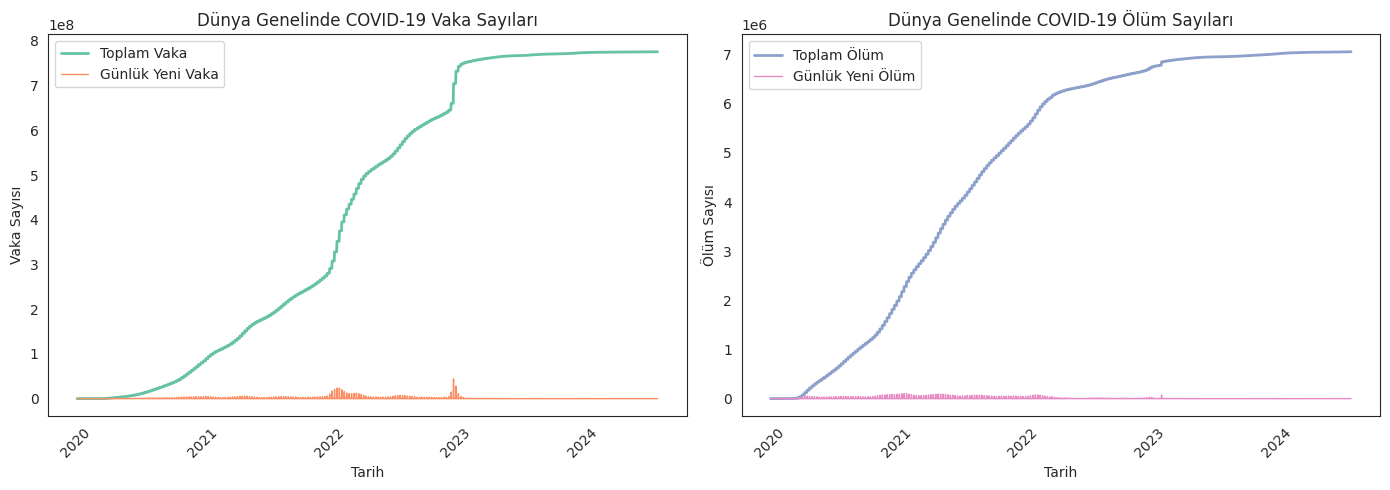

In [168]:
sns.set_style("white")

plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_world, x="date", y="total_cases", label="Toplam Vaka", color="#66c2a5", linewidth=2)
sns.lineplot(data=df_world, x="date", y="new_cases", label="Günlük Yeni Vaka", color="#fc8d62", linewidth=1)
plt.title("Dünya Genelinde COVID-19 Vaka Sayıları")
plt.xlabel("Tarih")
plt.ylabel("Vaka Sayısı")
plt.legend()
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(data=df_world, x="date", y="total_deaths", label="Toplam Ölüm", color="#8da0cb", linewidth=2)
sns.lineplot(data=df_world, x="date", y="new_deaths", label="Günlük Yeni Ölüm", color="#e78ac3", linewidth=1)
plt.title("Dünya Genelinde COVID-19 Ölüm Sayıları")
plt.xlabel("Tarih")
plt.ylabel("Ölüm Sayısı")
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**▪ Toplam ve Günlük Vaka Trendleri**  
- 2020 başlarında dünya genelinde ilk vakalar kaydedilmeye başlanmış, takip eden yıllarda pandemi küresel ölçekte yayılmıştır.  
- 2020’nin ortasından itibaren günlük yeni vakalarda düzenli dalgalanmalar gözlemlenmiştir.  
- 2021 ve 2022 yıllarında küresel çapta en yüksek vaka artışları yaşanmış, bazı zirvelerde günlük vaka sayıları olağanüstü seviyelere ulaşmıştır.  
- 2023 itibarıyla günlük yeni vaka sayılarında belirgin bir düşüş görülmüş ve raporlama büyük ölçüde azalmıştır.  
- Toplam vaka eğrisi ise bu dalgalarla birlikte sürekli artış göstermiş, ancak 2023’ten sonra yatay bir seyir izlemiştir.

**▪ Toplam ve Günlük Ölüm Trendleri**  
- İlk ölüm vakaları 2020'de kaydedilmiş, özellikle 2020 sonu ve 2021 başında yüksek günlük ölüm sayıları dikkat çekmiştir.  
- Vakalara oranla ölüm eğrisi daha dengeli bir artış sergilemiş ve 2022 sonrasında ciddi bir azalma eğilimine girmiştir.  
- 2023 yılıyla birlikte hem yeni ölüm sayıları hem de toplam ölümdeki artış hızı neredeyse durma noktasına gelmiştir.

**▪ Genel Değerlendirme**  
- Dünya genelinde COVID-19 pandemisi, birkaç güçlü dalga ile yayılmış; ancak aşılama, sağlık tedbirleri ve bağışıklığın artmasıyla etkisi giderek azalmıştır.  
- 2023 yılı itibarıyla hem vaka hem de ölüm sayılarında büyük bir düşüş yaşanmış; bu durum pandeminin kontrol altına alındığını ve veri raporlamasının azaldığını göstermektedir.

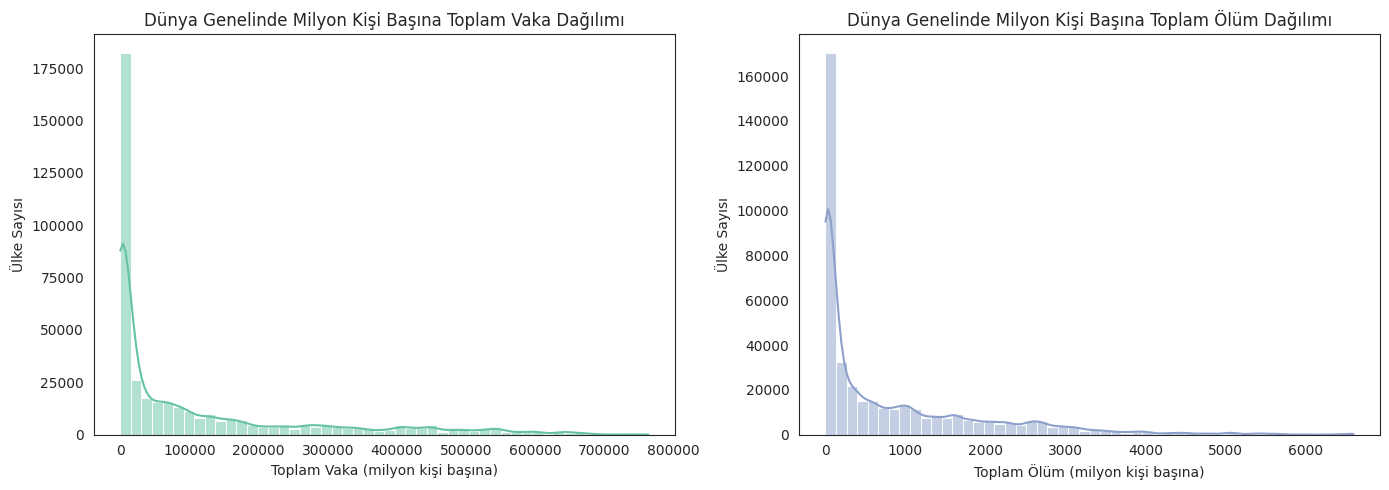

In [169]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='total_cases_per_million', bins=50, kde=True, color="#66c2a5")
plt.title("Dünya Genelinde Milyon Kişi Başına Toplam Vaka Dağılımı")
plt.xlabel("Toplam Vaka (milyon kişi başına)")
plt.ylabel("Ülke Sayısı")

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='total_deaths_per_million', bins=50, kde=True, color="#8da0cb")
plt.title("Dünya Genelinde Milyon Kişi Başına Toplam Ölüm Dağılımı")
plt.xlabel("Toplam Ölüm (milyon kişi başına)")
plt.ylabel("Ülke Sayısı")

plt.tight_layout()
plt.show()

- **Toplam Vaka Dağılımı**:
  - Milyon kişi başına düşen vaka sayıları ülkeler arasında oldukça geniş bir aralıkta dağılmıştır.
  - Çoğu ülke 0–200.000 bandında yoğunlaşsa da, çok yüksek vaka oranlarına sahip birkaç ülke grafiğin sağ kuyruğunda dikkat çekmektedir.
  - Bu, bazı ülkelerde yayılımın nüfusa oranla çok daha yoğun olduğunu göstermektedir.

- **Toplam Ölüm Dağılımı**:
  - Milyon kişi başına düşen ölüm sayıları genelde 0–3.000 aralığında yoğunlaşmakta, ancak bazı ülkelerde bu değer 6.000’i geçmektedir.
  - Ölüm oranlarındaki bu farklılıklar sağlık sistemlerinin kapasitesi, yaşlı nüfus oranı, aşılanma düzeyi ve pandemiye verilen yanıt gibi faktörlerle ilişkilendirilebilir.

- **Genel Değerlendirme**:
  - Vaka ve ölüm dağılımları simetrik değildir; birkaç uç değer (outlier) dağılımı sağa çekmekte ve varyansı artırmaktadır.
  - Bu durum, pandeminin etkilerinin dünya genelinde eşit dağılmadığını ve bazı ülkelerin orantısız şekilde daha fazla etkilendiğini ortaya koymaktadır.

##**Kıtalar Bazında Vaka ve Ölüm Sayıları Trendleri**

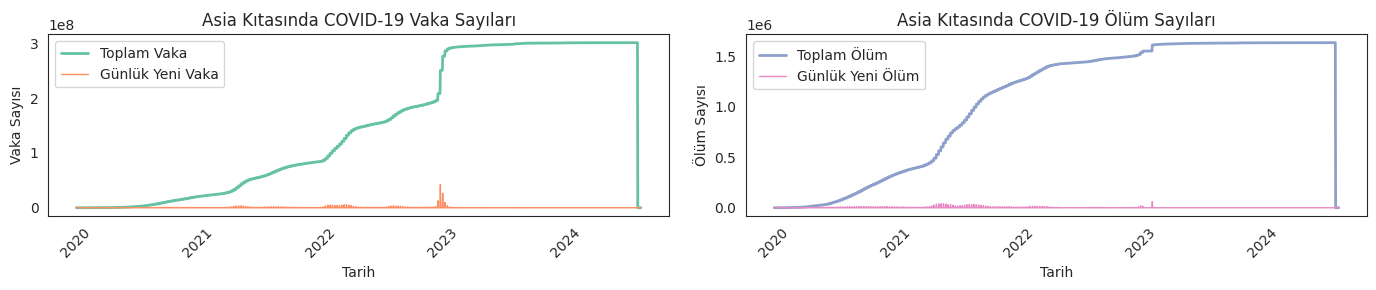

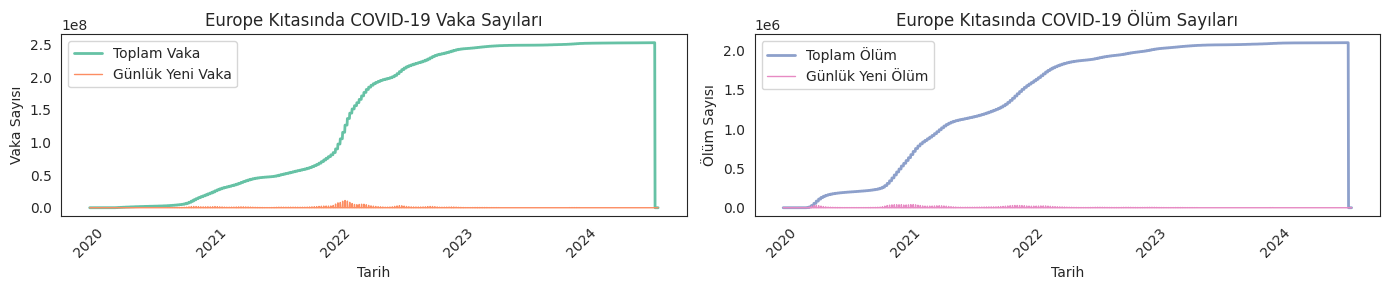

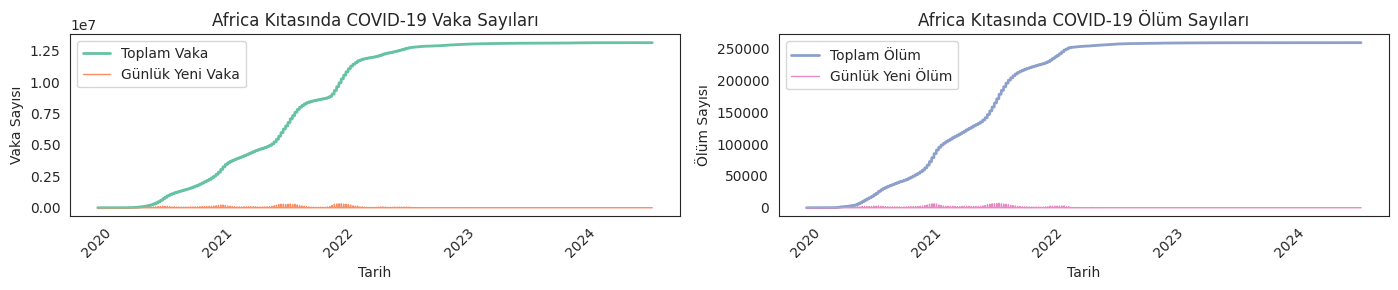

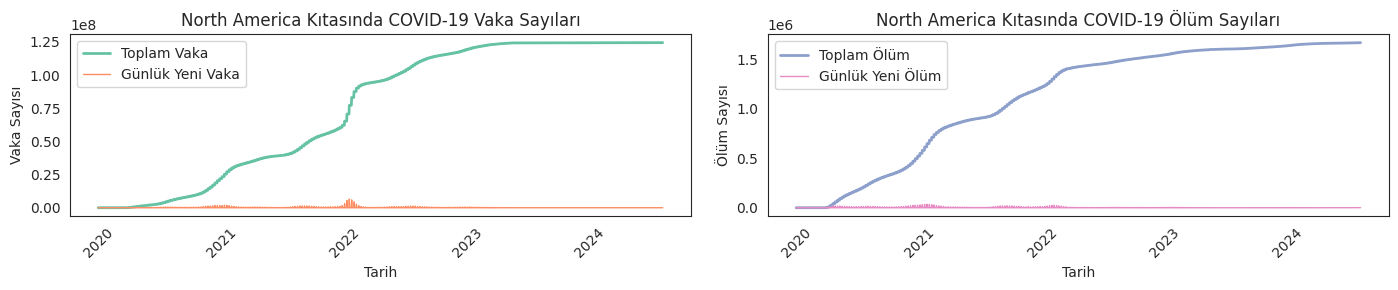

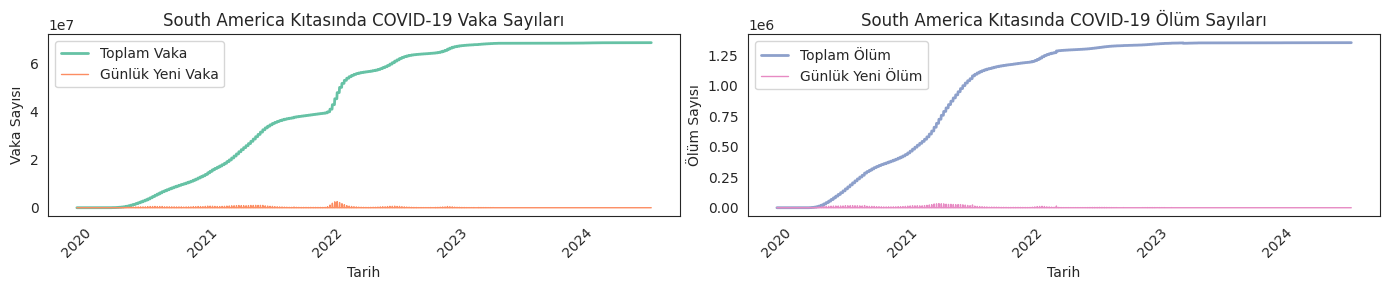

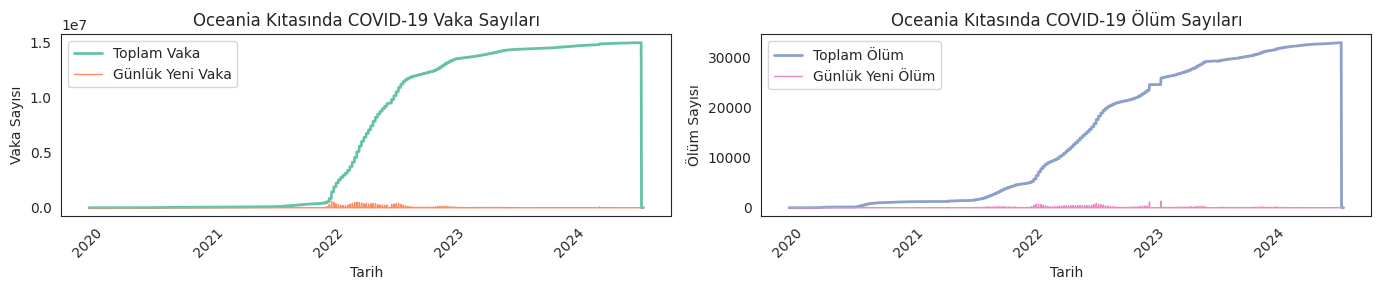

In [165]:
sns.set_style("white")
df['date'] = pd.to_datetime(df['date'])

continents = ['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']
for continent in continents:
    df_c = df[df['continent'] == continent].copy()

    df_c_grouped = df_c.groupby('date')[['total_cases', 'new_cases', 'total_deaths', 'new_deaths']].sum().reset_index()

    plt.figure(figsize=(14, 3))

    plt.subplot(1, 2, 1)
    sns.lineplot(data=df_c_grouped, x="date", y="total_cases", label="Toplam Vaka", color="#66c2a5", linewidth=2)
    sns.lineplot(data=df_c_grouped, x="date", y="new_cases", label="Günlük Yeni Vaka", color="#fc8d62", linewidth=1)
    plt.title(f"{continent} Kıtasında COVID-19 Vaka Sayıları")
    plt.xlabel("Tarih")
    plt.ylabel("Vaka Sayısı")
    plt.legend()
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    sns.lineplot(data=df_c_grouped, x="date", y="total_deaths", label="Toplam Ölüm", color="#8da0cb", linewidth=2)
    sns.lineplot(data=df_c_grouped, x="date", y="new_deaths", label="Günlük Yeni Ölüm", color="#e78ac3", linewidth=1)
    plt.title(f"{continent} Kıtasında COVID-19 Ölüm Sayıları")
    plt.xlabel("Tarih")
    plt.ylabel("Ölüm Sayısı")
    plt.legend()
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

#### Afrika (Africa)

- **Toplam vaka sayısı** Afrika kıtasında diğer kıtalara göre oldukça düşük seyretmiştir. Bu durum test kapasitesi, demografi ve raporlama farklılıklarıyla açıklanabilir.
- **Günlük yeni vakalar**, zaman zaman küçük sıçramalarla yükselmiş ancak büyük salgın dalgaları gözlemlenmemiştir.
- **Ölüm verileri** de benzer şekilde düşük kalmış, 2023 sonrasında neredeyse tamamen sabitlenmiştir.
- Genel olarak Afrika'da pandeminin etkisinin diğer kıtalara göre daha az kaydedildiği görülmektedir.

---

#### Asya (Asia)

- **Toplam vaka** açısından Asya, dünya genelinde en yüksek sayıya ulaşan kıtalardan biridir. Özellikle 2022 ortasında ciddi bir sıçrama yaşanmıştır.
- **Günlük yeni vakalar** 2021-2022 arasında belirgin zirveler göstermiştir. Ancak 2023 ile birlikte büyük ölçüde düşmüştür.
- **Ölüm sayıları** da vakalarla paralel artış göstermiş, ancak vaka sayısına oranla daha dengeli seyretmiştir.
- Bu tablo, bölgesel farklılıklar (örneğin Çin, Hindistan gibi ülkeler) ve veri raporlamadaki çeşitlilik ile açıklanabilir.

---

#### Avrupa (Europe)

- **Toplam vaka eğrisi**, 2021 ve 2022’de keskin artışlar göstermiş, 2023 sonrası sabitlenmiştir.
- **Günlük yeni vakalar** özellikle 2022 başında yoğun dalgalarla dikkat çekmiştir.
- **Toplam ölümler** sabit bir artışla devam etmiş ve 2023'te durağan hale gelmiştir.
- Avrupa’da pandeminin yoğunluğu, sıkı test uygulamaları ve yaşlı nüfus oranıyla ilişkilendirilebilir.

---

#### Kuzey Amerika (North America)

- **Vaka sayıları**, 2020'nin ikinci yarısından itibaren hızla artmış ve 2022 itibarıyla zirveye ulaşmıştır.
- **Günlük yeni vakalar**, dönemsel dalgalarla çok yüksek seviyelere ulaşmıştır.
- **Ölüm verileri**, 2020 ve 2021'de özellikle yüksektir; 2022 sonrası düşüş eğilimi göstermektedir.
- ABD'nin verilerdeki baskın etkisi, bu kıtadaki trendlerin yönünü belirlemiştir.

---

#### Güney Amerika (South America)

- **Toplam vaka** ve **günlük yeni vaka sayıları**, 2021 yılında ciddi bir artış göstermiştir.
- **Ölüm sayıları**, 2021 ortasında zirve yapmış ve sonrasında giderek azalmıştır.
- Kıtadaki sağlık sistemleri üzerindeki yük ve aşı erişimi, ölüm oranlarını etkileyen başlıca faktörler olmuştur.

---

#### Okyanusya (Ocenia)

- **Toplam vaka** eğrisi, 2022 yılına kadar oldukça yatay seyretmiş, bu tarihten sonra belirgin bir yükselme görülmüştür.
- **Günlük vakalar**, özellikle 2022 başlarında büyük artış göstermiştir.
- **Ölüm sayıları**, diğer kıtalara kıyasla oldukça düşüktür; vaka artışına rağmen ölüm oranlarının sınırlı kalması dikkat çekicidir.
- Bu tablo, ada ülkelerinin uyguladığı katı karantina ve sınır politikalarıyla ilişkilendirilebilir.

---

### Genel Kıta Karşılaştırması

- 2021 ve 2022 yılları, hemen tüm kıtalarda vaka ve ölüm sayılarının zirve yaptığı dönemlerdir.
- Asya ve Avrupa en yüksek vaka sayılarına ulaşırken, Afrika ve Okyanusya görece daha az etkilenmiştir.
- 2023 ve sonrasında tüm kıtalarda eğriler yatay seyretmeye başlamış, pandeminin yayılım hızı ve raporlaması ciddi biçimde azalmıştır.

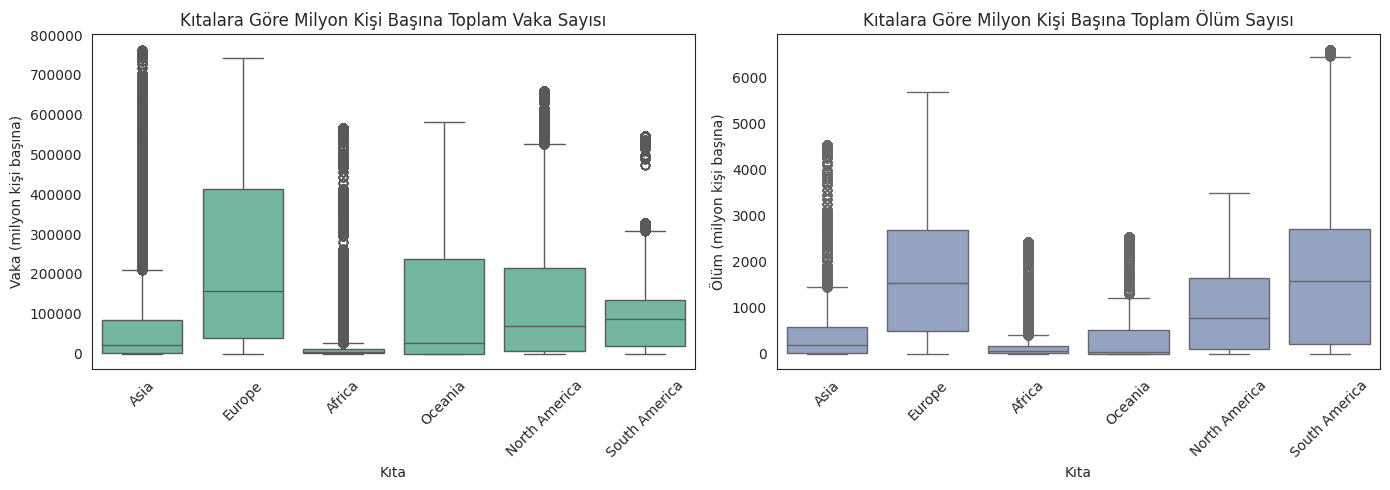

In [137]:
# Milyon kişi başına düşen vaka/ölüm boxplotları (kıtalara göre)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df[df['continent'].notna()], x='continent', y='total_cases_per_million',color="#66c2a5")
plt.title("Kıtalara Göre Milyon Kişi Başına Toplam Vaka Sayısı")
plt.xlabel("Kıta")
plt.ylabel("Vaka (milyon kişi başına)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df[df['continent'].notna()], x='continent', y='total_deaths_per_million',color="#8da0cb")
plt.title("Kıtalara Göre Milyon Kişi Başına Toplam Ölüm Sayısı")
plt.xlabel("Kıta")
plt.ylabel("Ölüm (milyon kişi başına)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### 1. Vaka Dağılımı (Milyon Kişi Başına)
- **Avrupa** ve **Okyanusya**, medyan değerleri açısından milyon kişi başına en yüksek vaka sayısına sahip kıtalardır.
- **Afrika**, hem medyan hem de genel dağılım bakımından açık ara en düşük vaka oranlarına sahiptir.
- **Asya** kıtasında da vaka oranları görece düşüktür ancak uç değerli ülkeler vardır (örneğin yüksek test kapasitesine sahip olanlar).
- **Kuzey ve Güney Amerika**, orta düzeyde medyanlara sahip olmakla birlikte geniş dağılımlarla dikkat çeker.

#### 2. Ölüm Dağılımı (Milyon Kişi Başına)
- **Güney Amerika**, milyon kişi başına ölüm oranlarında en yüksek medyana sahiptir ve uç değerleri de oldukça yüksektir.
- **Avrupa**, ölüm oranlarında ikinci sıradadır; hem medyan hem de varyans oldukça fazladır.
- **Afrika** ve **Asya**, ölüm oranları açısından en düşük değerlere sahip kıtalardır.
- **Okyanusya**, sınırlı ülke sayısı ile dar ve görece düşük oranlı bir dağılım sergiler.

#### 3. Genel Değerlendirme
- Gelişmiş test altyapısı ve veri raporlama sistemlerine sahip kıtalar (örneğin Avrupa ve Okyanusya), daha yüksek vaka oranları gösterebilir ancak ölüm oranlarında daha istikrarlı kalabilir.
- Düşük vaka ve ölüm oranları (örneğin Afrika, Asya) her zaman daha iyi bir tabloya işaret etmeyebilir; test kısıtları, demografik farklılıklar veya raporlama eksiklikleri bu sonucu etkileyebilir.
- Ölüm oranlarındaki yükseklik, yalnızca hastalık yayılımını değil, aynı zamanda sağlık sistemlerinin kapasitesini ve krize yanıt gücünü de yansıtır.

##**Türkiye'de Vaka ve Ölüm Sayıları Trendleri**

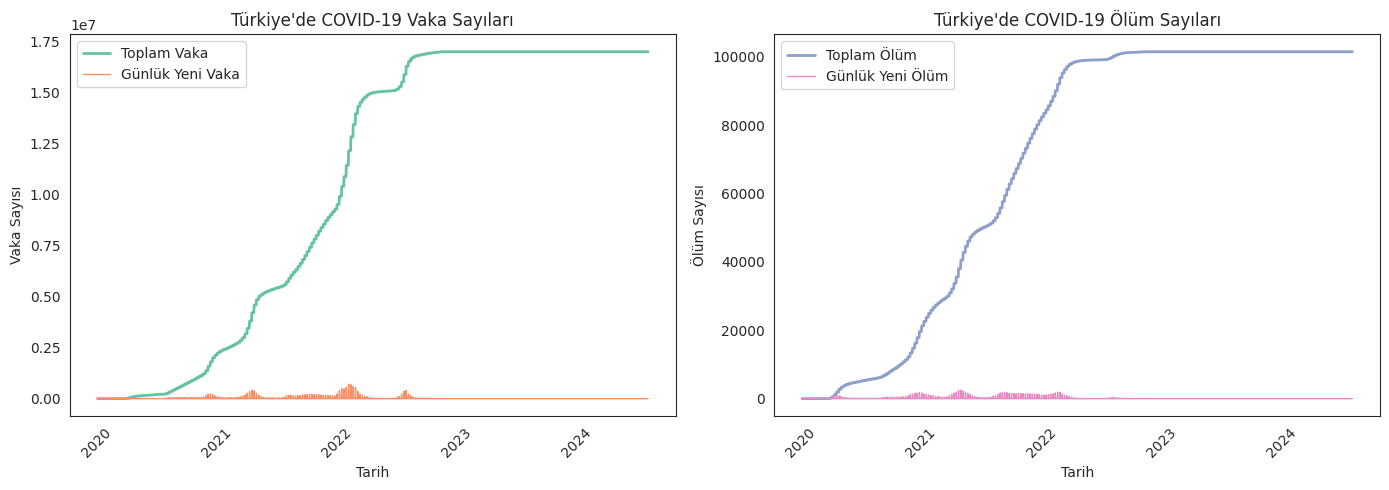

In [133]:
sns.set_style("white")
df_tr = df[df["location"] == "Turkey"].copy()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_tr, x="date", y="total_cases", label="Toplam Vaka", color="#66c2a5", linewidth=2)
sns.lineplot(data=df_tr, x="date", y="new_cases", label="Günlük Yeni Vaka", color="#fc8d62", linewidth=1)
plt.title("Türkiye'de COVID-19 Vaka Sayıları")
plt.xlabel("Tarih")
plt.ylabel("Vaka Sayısı")
plt.legend()
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(data=df_tr, x="date", y="total_deaths", label="Toplam Ölüm", color="#8da0cb", linewidth=2)
sns.lineplot(data=df_tr, x="date", y="new_deaths", label="Günlük Yeni Ölüm", color="#e78ac3", linewidth=1)
plt.title("Türkiye'de COVID-19 Ölüm Sayıları")
plt.xlabel("Tarih")
plt.ylabel("Ölüm Sayısı")
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**▪ Toplam ve Günlük Vaka Trendleri**  
- Türkiye’de COVID-19 vakaları 2020'nin ilk aylarında kaydedilmeye başlamış ve zamanla dalgalar hâlinde artmıştır.  
- Özellikle 2020 sonu, 2021 ortası ve 2022 başında günlük yeni vaka sayılarında dikkat çekici zirveler görülmektedir.  
- Toplam vaka sayısı bu dalgalar sırasında keskin bir şekilde artmış, 2022’nin ortasından sonra ise artış hızı yavaşlamıştır.  
- 2023 ve sonrasında yeni vaka bildirimleri neredeyse sıfırlanmış, bu da pandeminin etkisinin azaldığına işaret etmektedir.

**▪ Toplam ve Günlük Ölüm Trendleri**  
- Ölüm eğrisi, vaka trendine benzer şekilde dalgalar hâlinde yükselmiş; ancak zirveler vaka sayısına göre daha dar ve yoğun olmuştur.  
- En yüksek ölüm oranları 2020 sonu ve 2021’in ilk yarısında gözlemlenmiştir.  
- 2022 sonrasındaki ölüm sayıları da oldukça düşmüş ve 2023 itibarıyla neredeyse sıfıra yaklaşmıştır.

**▪ Genel Değerlendirme**  
- Türkiye’de pandemi boyunca çeşitli dalgalar yaşanmış olsa da, aşılama ve önlemlerin etkisiyle 2022 itibarıyla hem vaka hem de ölüm sayılarında ciddi bir azalma görülmektedir.  
- Günlük yeni vaka ve ölüm verilerinin son dönemde neredeyse hiç raporlanmıyor olması, pandeminin kontrol altına alındığını göstermektedir.

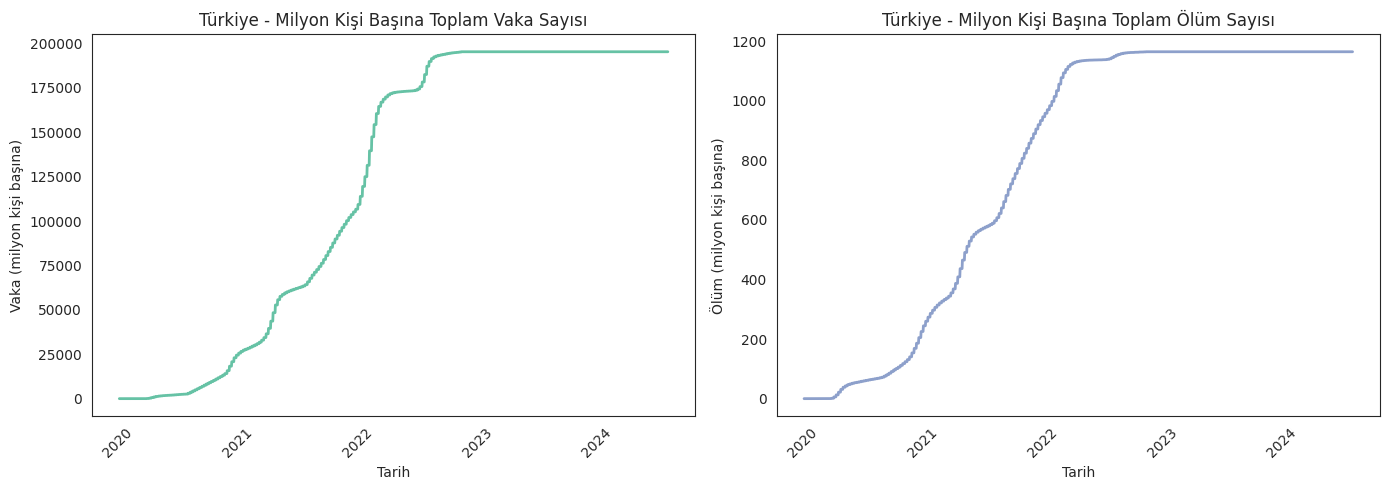

In [138]:
sns.set_style("white")
df_tr = df[df['location'] == 'Turkey']

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_tr, x='date', y='total_cases_per_million', color="#66c2a5", linewidth=2)
plt.title("Türkiye - Milyon Kişi Başına Toplam Vaka Sayısı")
plt.xlabel("Tarih")
plt.ylabel("Vaka (milyon kişi başına)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(data=df_tr, x='date', y='total_deaths_per_million', color="#8da0cb", linewidth=2)
plt.title("Türkiye - Milyon Kişi Başına Toplam Ölüm Sayısı")
plt.xlabel("Tarih")
plt.ylabel("Ölüm (milyon kişi başına)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- **Ortanca ve Genel Eğilim:**
  - Türkiye’de milyon kişi başına düşen toplam **vaka sayısı**, 2020’nin ortalarından 2022 başlarına kadar hızla artmış, ardından daha yatay bir seyir izlemeye başlamıştır. Özellikle 2021 yılındaki dik sıçramalar dikkat çekicidir.
  - **Ölüm sayılarında da** benzer bir artış gözlenmektedir; 2020 sonlarından 2022 başlarına kadar belirgin bir artış eğrisi vardır. 2022’den sonra eğri yataylaşarak yeni ölümlerin azaldığını göstermektedir.

- **Dağılım ve Doyma Noktası:**
  - 2022 sonrası her iki grafikte de eğriler neredeyse düzleşmiştir. Bu, vaka ve ölüm sayılarının artış hızının azaldığını ve pandeminin kontrol altına alınmaya başladığını gösterir.

- **Yoğun Artış Dönemleri:**
  - Her iki grafikte de özellikle 2021 yılı civarında dik artışlar görülmekte, bu da Türkiye’de pandeminin en yoğun yaşandığı döneme işaret etmektedir.

- **Karşılaştırmalı Bakış:**
  - Vaka sayısındaki artış ölüm oranına kıyasla çok daha fazladır. Bu da aşılama, tedavi protokolleri veya virüsün zamanla daha az ölümcül hale gelmesi gibi faktörlerle açıklanabilir.

**Sonuç:** Türkiye’de pandemi sürecinde milyon kişi başına düşen vaka ve ölüm sayıları 2020-2021 döneminde büyük sıçramalarla artmış, 2022 sonrasında ise ciddi biçimde yatay seyretmeye başlamıştır.

#**Demografik Etkenler ile Vaka/Ölüm İlişkisi**

##**Dünya Genelinde Demografik Etkenler ile Vaka/Ölüm İlişkisi**

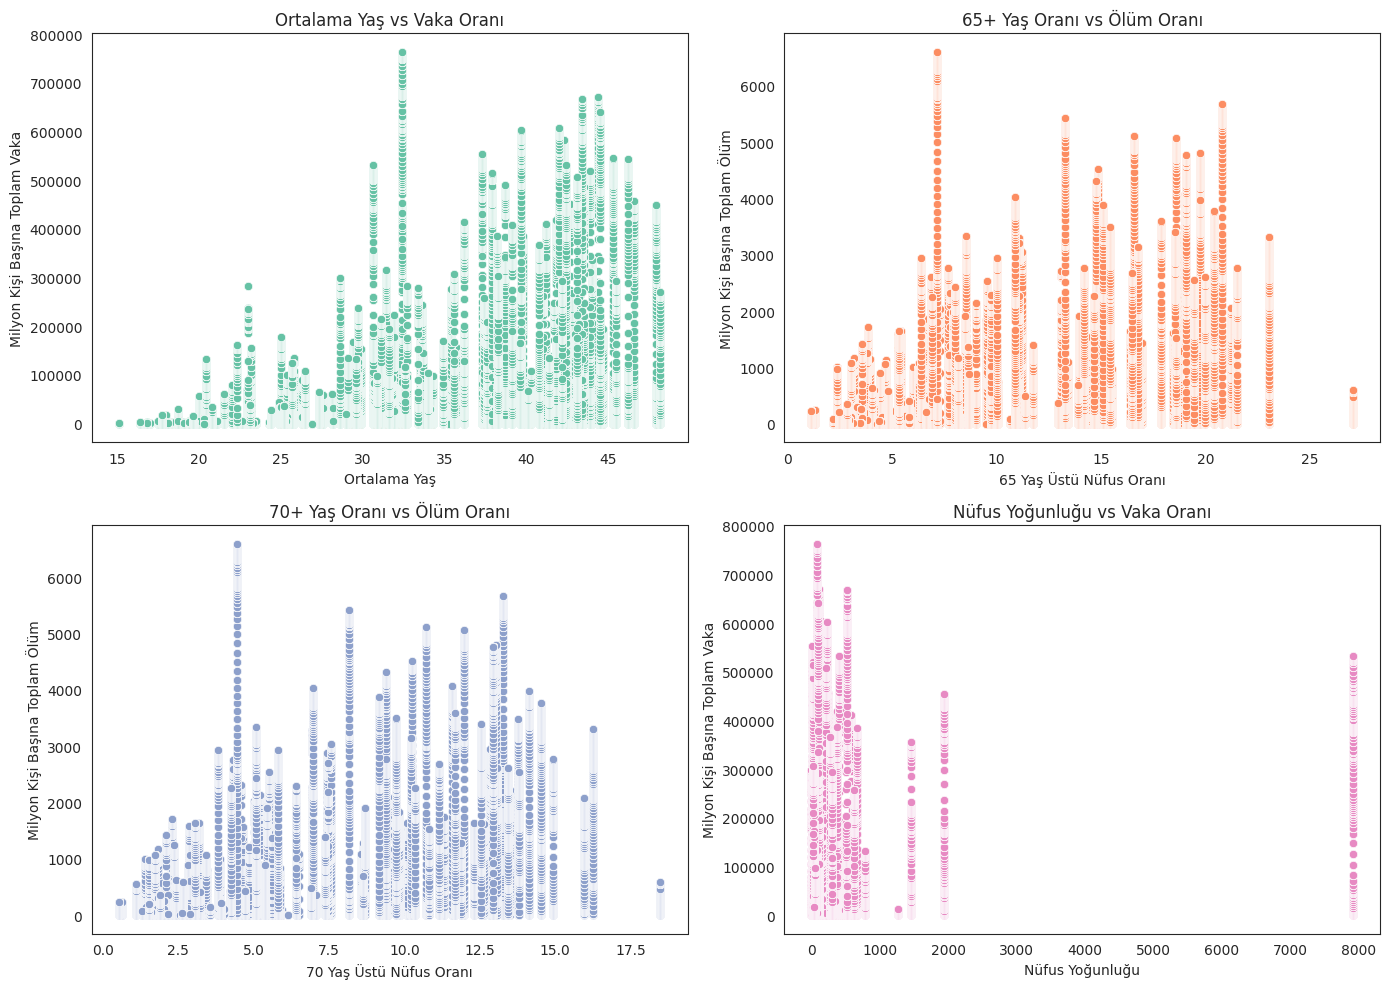

In [163]:
sns.set_style("white")

demo_cols = ['location', 'median_age', 'aged_65_older', 'aged_70_older', 'population_density',
             'total_cases_per_million', 'total_deaths_per_million']
df_demo = df[demo_cols].dropna()

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df_demo, x='median_age', y='total_cases_per_million', color="#66c2a5")
plt.xlabel("Ortalama Yaş")
plt.ylabel("Milyon Kişi Başına Toplam Vaka")
plt.title("Ortalama Yaş vs Vaka Oranı")

plt.subplot(2, 2, 2)
sns.scatterplot(data=df_demo, x='aged_65_older', y='total_deaths_per_million', color="#fc8d62")
plt.xlabel("65 Yaş Üstü Nüfus Oranı")
plt.ylabel("Milyon Kişi Başına Toplam Ölüm")
plt.title("65+ Yaş Oranı vs Ölüm Oranı")

plt.subplot(2, 2, 3)
sns.scatterplot(data=df_demo, x='aged_70_older', y='total_deaths_per_million', color="#8da0cb")
plt.xlabel("70 Yaş Üstü Nüfus Oranı")
plt.ylabel("Milyon Kişi Başına Toplam Ölüm")
plt.title("70+ Yaş Oranı vs Ölüm Oranı")

plt.subplot(2, 2, 4)
sns.scatterplot(data=df_demo, x='population_density', y='total_cases_per_million', color="#e78ac3")
plt.xlabel("Nüfus Yoğunluğu")
plt.ylabel("Milyon Kişi Başına Toplam Vaka")
plt.title("Nüfus Yoğunluğu vs Vaka Oranı")

plt.tight_layout()
plt.show()

- **Ortalama Yaş vs Vaka Oranı**
  - Ortalama yaş yükseldikçe milyon kişi başına vaka sayısında artış gözlenmektedir.
  - Bu durum, yaşlı nüfusa sahip ülkelerde daha yaygın testleme ve raporlama olasılığıyla birlikte, yaşlı bireylerin daha fazla etkilenmesinden kaynaklanabilir.

- **65 Yaş Üstü Oranı vs Ölüm Oranı**
  - 65 yaş üzeri nüfus oranı arttıkça milyon kişi başına ölüm sayısı da artma eğilimindedir.
  - Bu ilişki, yaşlı nüfusun COVID-19’a karşı daha savunmasız olduğunu desteklemektedir.

- **70 Yaş Üstü Oranı vs Ölüm Oranı**
  - 70 yaş üstü nüfus oranı ile ölüm oranı arasında da benzer şekilde pozitif bir ilişki görülmektedir.
  - Özellikle çok yüksek yaş oranına sahip ülkelerde ölüm oranlarının belirgin şekilde arttığı görülmektedir.

- **Nüfus Yoğunluğu vs Vaka Oranı**
  - Nüfus yoğunluğu arttıkça milyon kişi başına düşen vaka sayısında genel bir artış eğilimi gözlemlenmektedir.
  - Bu, yoğun şehirleşmenin hastalığın yayılımını kolaylaştırdığına dair yaygın görüşle örtüşmektedir.

##**Kıtalar Bazında Demografik Etkenler ile Vaka/Ölüm İlişkisi**

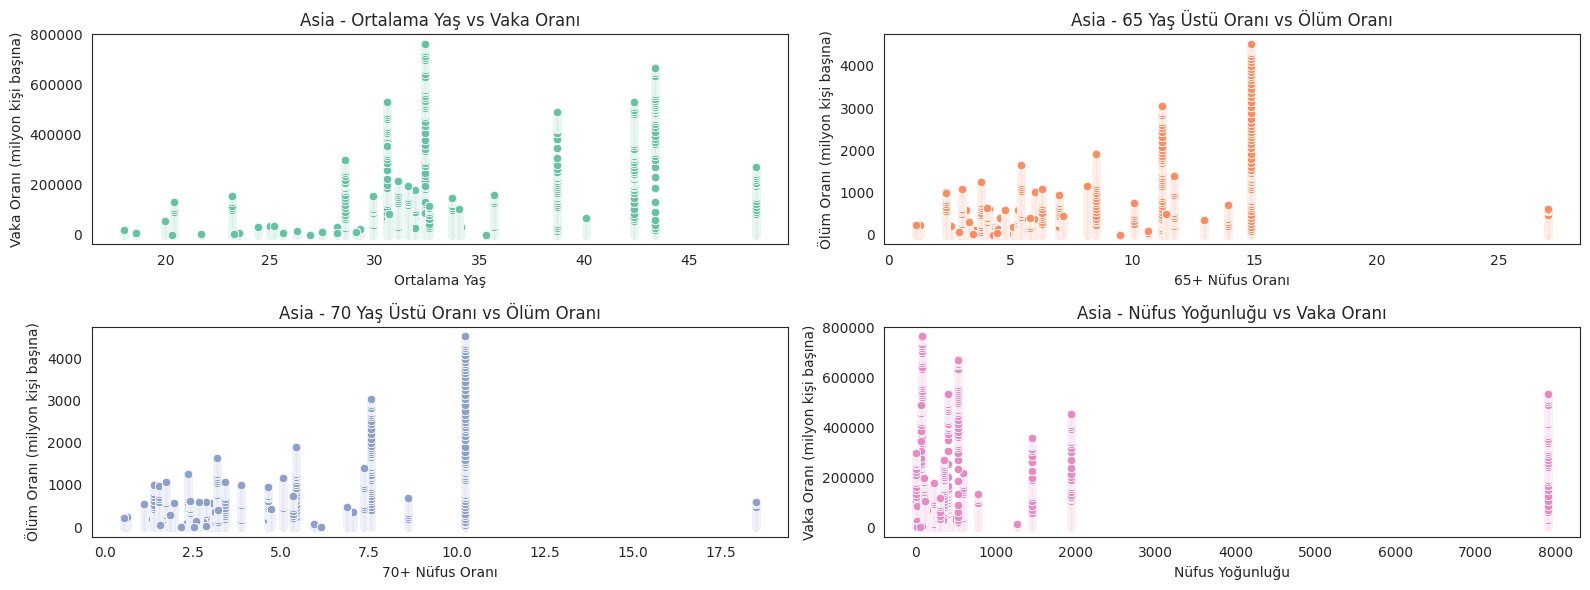

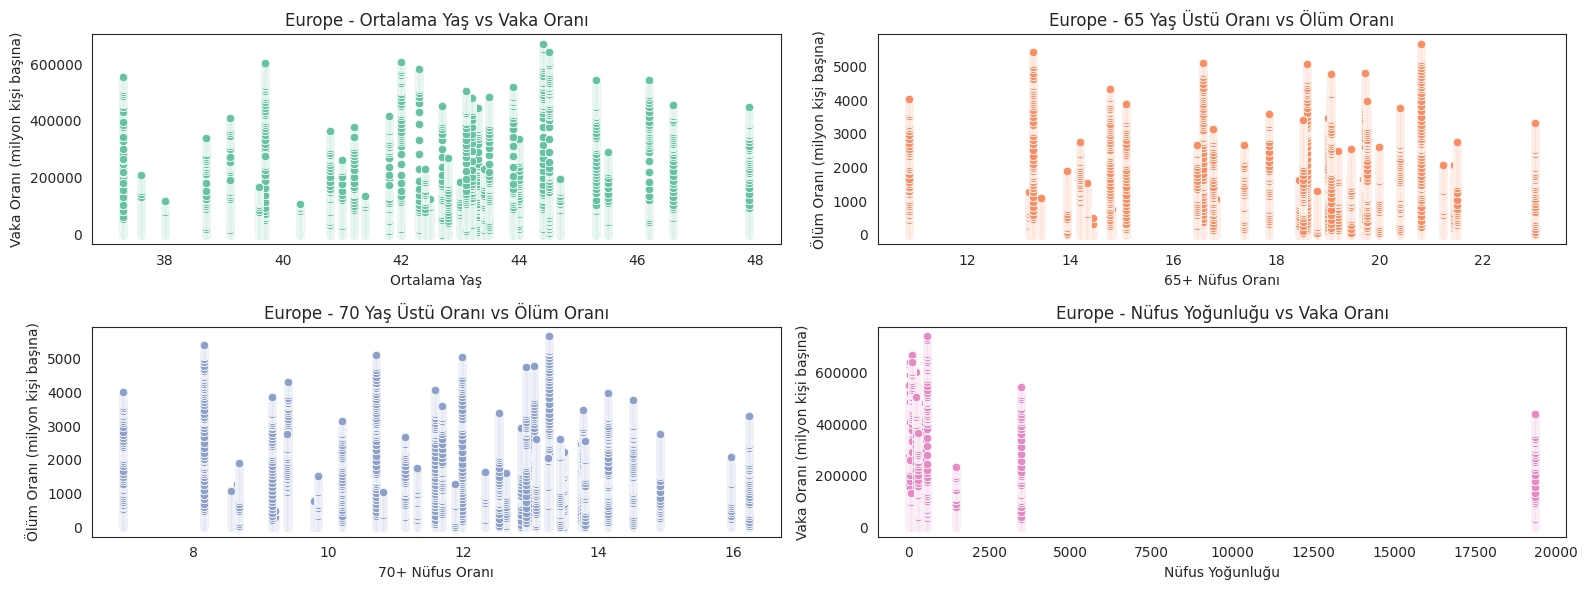

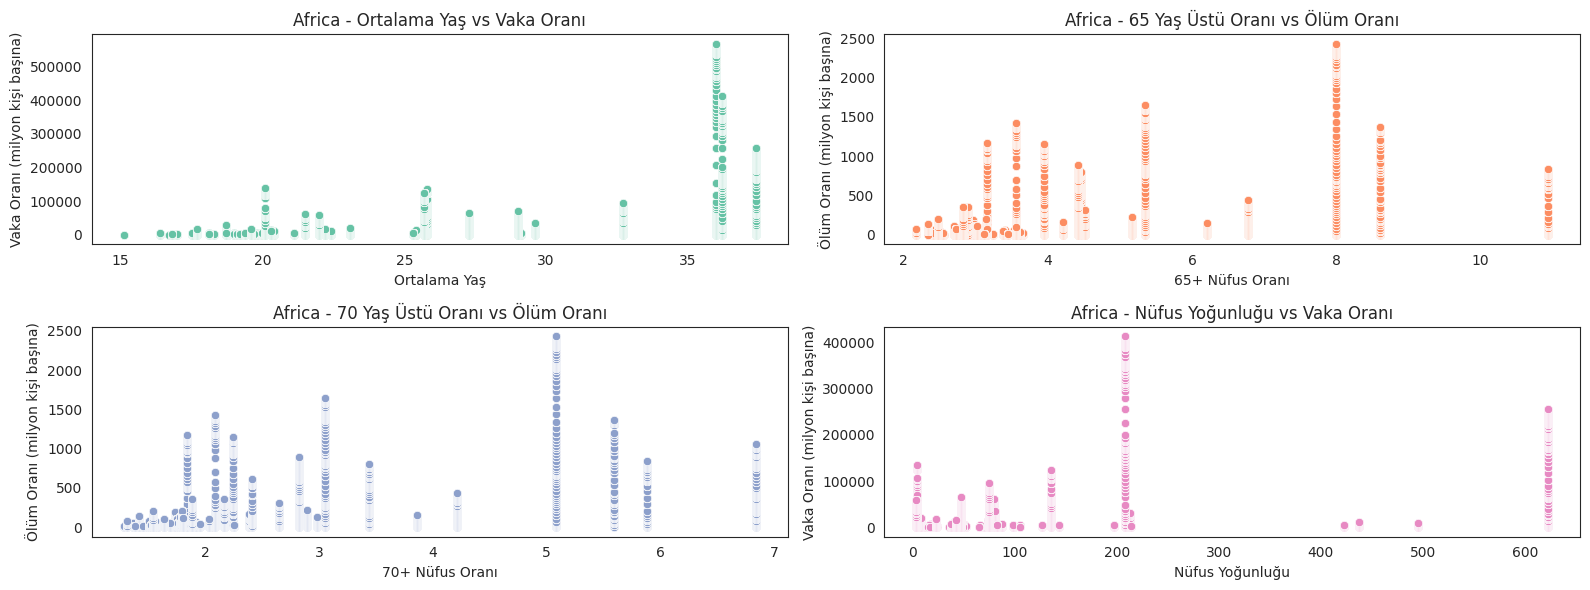

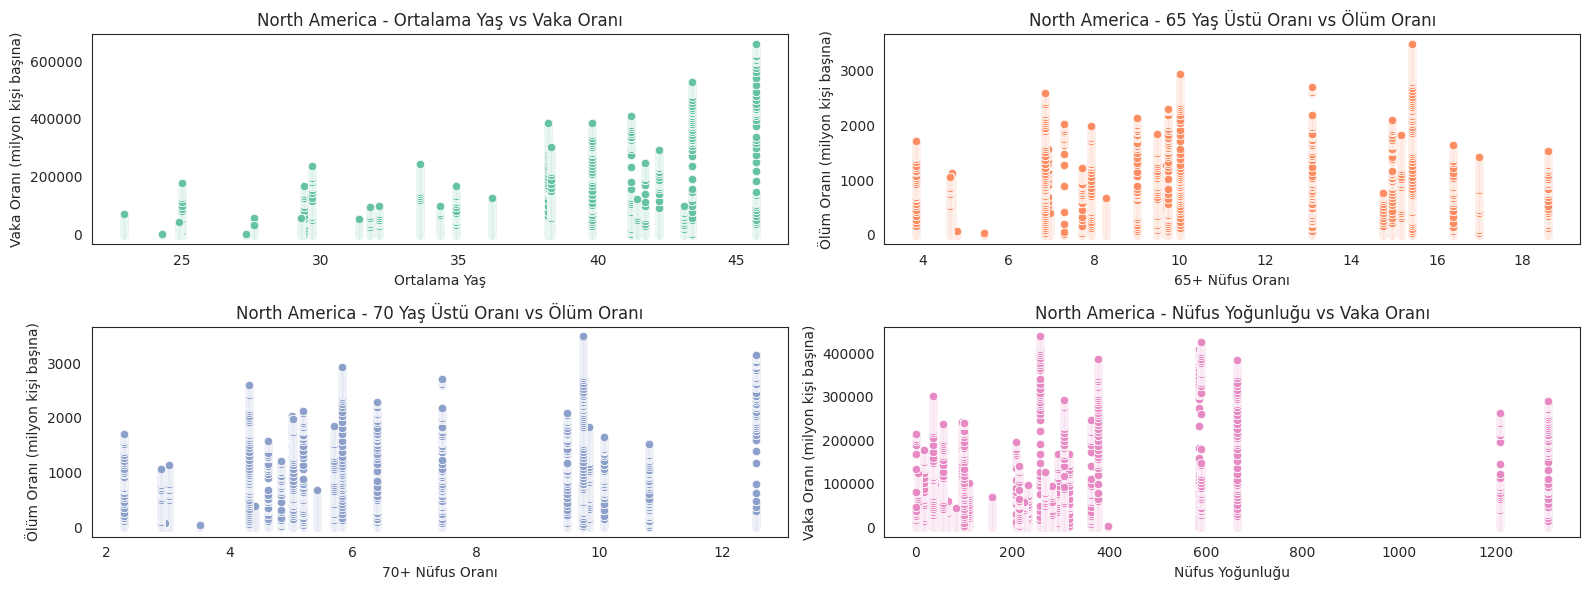

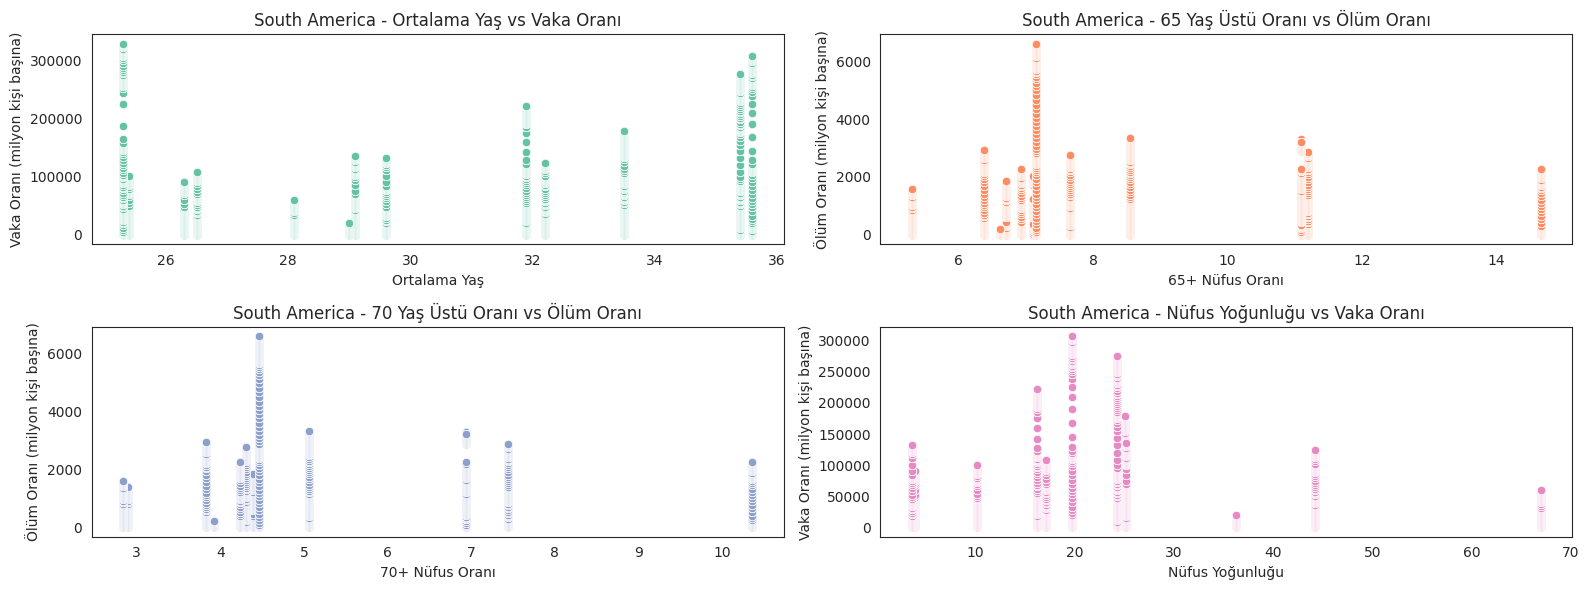

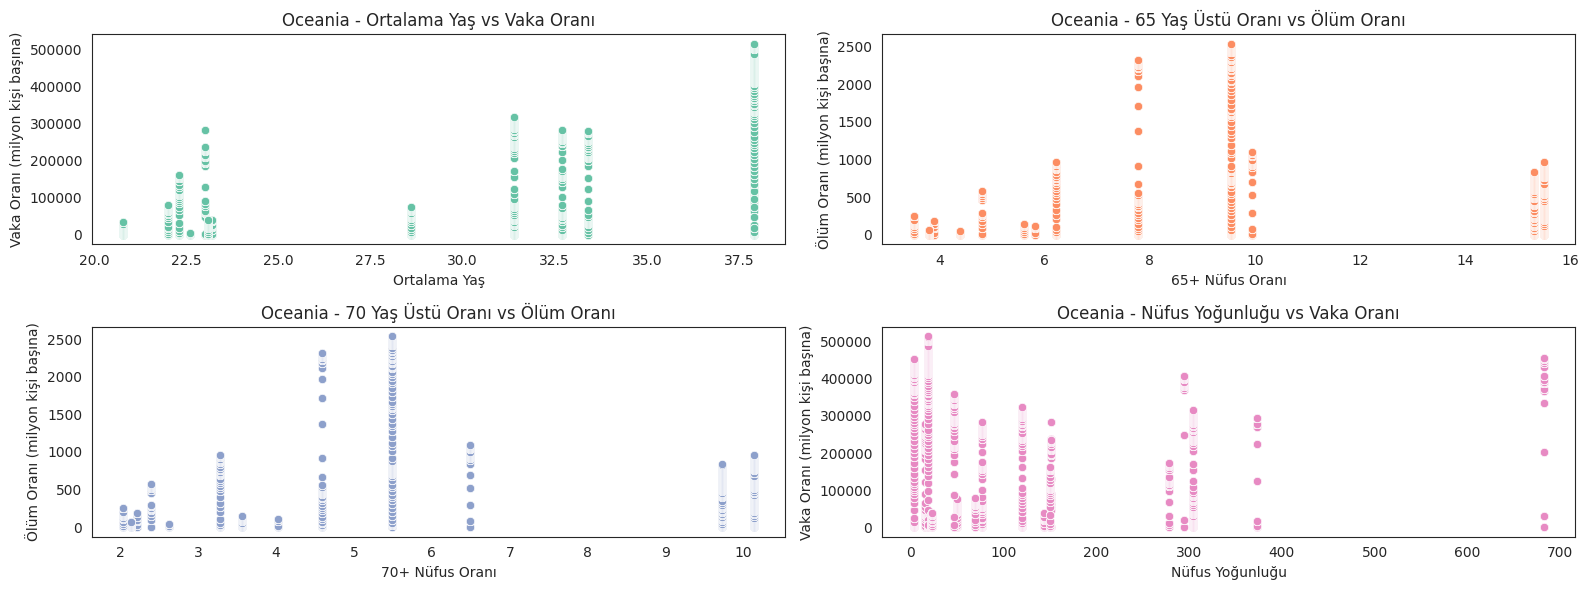

In [171]:
sns.set_style("white")

continents = ['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

for continent in continents:
    df_c = df[df['continent'] == continent].copy()

    plt.figure(figsize=(16, 6))

    plt.subplot(2, 2, 1)
    sns.scatterplot(data=df_c, x='median_age', y='total_cases_per_million', color="#66c2a5")
    plt.title(f"{continent} - Ortalama Yaş vs Vaka Oranı")
    plt.xlabel("Ortalama Yaş")
    plt.ylabel("Vaka Oranı (milyon kişi başına)")

    plt.subplot(2, 2, 2)
    sns.scatterplot(data=df_c, x='aged_65_older', y='total_deaths_per_million', color="#fc8d62")
    plt.title(f"{continent} - 65 Yaş Üstü Oranı vs Ölüm Oranı")
    plt.xlabel("65+ Nüfus Oranı")
    plt.ylabel("Ölüm Oranı (milyon kişi başına)")

    plt.subplot(2, 2, 3)
    sns.scatterplot(data=df_c, x='aged_70_older', y='total_deaths_per_million', color="#8da0cb")
    plt.title(f"{continent} - 70 Yaş Üstü Oranı vs Ölüm Oranı")
    plt.xlabel("70+ Nüfus Oranı")
    plt.ylabel("Ölüm Oranı (milyon kişi başına)")

    plt.subplot(2, 2, 4)
    sns.scatterplot(data=df_c, x='population_density', y='total_cases_per_million', color="#e78ac3")
    plt.title(f"{continent} - Nüfus Yoğunluğu vs Vaka Oranı")
    plt.xlabel("Nüfus Yoğunluğu")
    plt.ylabel("Vaka Oranı (milyon kişi başına)")

    plt.tight_layout()
    plt.show()

#### Asya (Asia)
- Ortalama yaş arttıkça vaka oranında artış gözleniyor.
- 65+ ve 70+ yaş oranlarının artışı ölüm oranlarını da yukarı çekiyor.
- Nüfus yoğunluğu arttıkça vaka oranı da belirgin şekilde artmakta.

#### Avrupa (Europe)
- Ortalama yaşın yüksek olduğu ülkelerde vaka oranı genellikle daha fazla.
- Yaşlı nüfus oranı arttıkça ölüm oranlarında net bir artış gözlemleniyor.
- Yoğun nüfuslu ülkelerde vaka oranı yüksek ancak varyans da fazla.

#### Afrika (Africa)
- Ortalama yaşın düşük olduğu kıtada vaka oranı da daha düşük seyrediyor.
- Yaşlı nüfus oranı düşük olmasına rağmen ölüm oranı düşük seviyelerde dengeli.
- Nüfus yoğunluğu ile vaka oranı arasında zayıf bir ilişki var gibi görünüyor.

#### Kuzey Amarika (North America)
- Ortalama yaşla vaka oranı arasında pozitif bir ilişki var.
- Yaşlı nüfus oranının artışı ölüm oranlarını da artırıyor.
- Nüfus yoğunluğu arttıkça vaka oranları belirgin şekilde yükseliyor.

#### Güney Amerika (South America)
- Ortalama yaş arttıkça vaka oranı da yükseliyor.
- 65+ ve 70+ yaş oranları ölüm oranlarını etkiliyor ancak veri dağılımı daha dağınık.
- Nüfus yoğunluğu ile vaka oranı arasında güçlü bir ilişki var.

#### Okyanusya (Oceania)
- Ortalama yaş arttıkça vaka oranında artış görülüyor.
- 65+ ve 70+ yaş nüfus oranlarının ölüm oranlarıyla bağlantısı belirgin.
- Nüfus yoğunluğu ile vaka oranı arasında orta düzeyde bir ilişki mevcut.

##**Türkiye'de Demografik Etkenler ile Vaka/Ölüm İlişkisi**

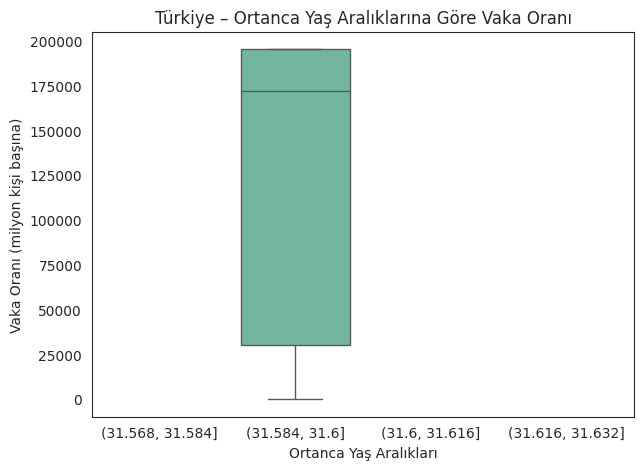

In [196]:
df_tr['median_age_cat'] = pd.cut(df_tr['median_age'], bins=4)

sns.set_style("white")
plt.figure(figsize=(7,5))
sns.boxplot(data=df_tr, x='median_age_cat', y='total_cases_per_million', color="#66c2a5")
plt.title("Türkiye – Ortanca Yaş Aralıklarına Göre Vaka Oranı")
plt.xlabel("Ortanca Yaş Aralıkları")
plt.ylabel("Vaka Oranı (milyon kişi başına)")
plt.show()

###Türkiye – Ortanca Yaş Aralıklarına Göre Vaka Oranı

**• Ortanca:** Ortanca yaş yükseldikçe vaka oranı da artma eğilimindedir. En yüksek yaş grubunda medyan vaka oranı oldukça yüksektir.

**• Ortalama:** Ortalama değerler de yaşla birlikte artış göstermektedir, özellikle 31.6 yaş üzeri grupta vaka oranları belirgin biçimde yükselmiştir.

**• Dağılım:** En düşük ortanca yaş grubunda hem medyan hem dağılım daha düşüktür; yüksek yaş aralıklarında ise geniş bir dağılım gözlenmektedir.

- Türkiye'de ortanca yaşın artmasıyla birlikte vaka oranlarında ciddi bir yükselme olduğu görülmektedir. Bu durum, yaşlı nüfusun virüse karşı daha hassas olduğunu ve bu yaş grubunun daha fazla etkilenmiş olabileceğini düşündürmektedir.

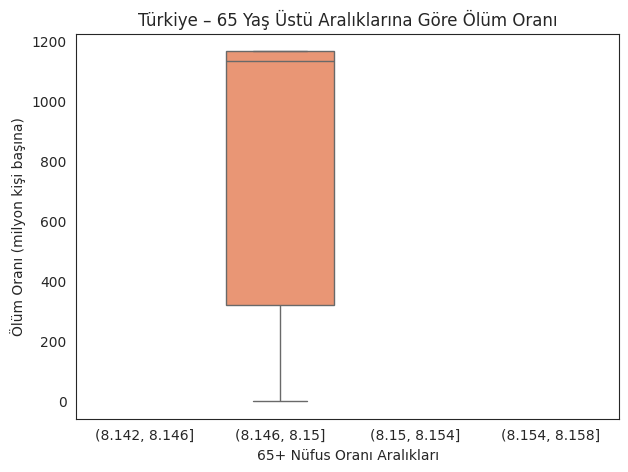

In [197]:
df_tr['aged_65_cat'] = pd.cut(df_tr['aged_65_older'], bins=4)

sns.set_style("white")
plt.figure(figsize=(7,5))
sns.boxplot(data=df_tr, x='aged_65_cat', y='total_deaths_per_million', color="#fc8d62")
plt.title("Türkiye – 65 Yaş Üstü Aralıklarına Göre Ölüm Oranı")
plt.xlabel("65+ Nüfus Oranı Aralıkları")
plt.ylabel("Ölüm Oranı (milyon kişi başına)")
plt.show()

###Türkiye – 65 Yaş Üstü Aralıklarına Göre Ölüm Oranı

**• Ortanca:** En yüksek yaş aralığında ortanca değer oldukça yüksek olup, yaklaşık 1150 seviyelerindedir.

**• Ortalama:** Ortalama değer de yüksek yaş aralıklarında artış göstermektedir. Ancak bazı gruplarda yayılım daha geniştir.

**• Dağılım:** Dört aralık içinde en geniş dağılım 3. aralıktadır. En düşük yaş aralığında ise ölüm oranı sıfıra yakındır.

- 65 yaş üstü nüfus oranı arttıkça, ölüm oranında ciddi bir artış gözlemlenmektedir. Bu da yaşlı nüfusun pandemi etkilerinden daha fazla etkilendiğini göstermektedir.

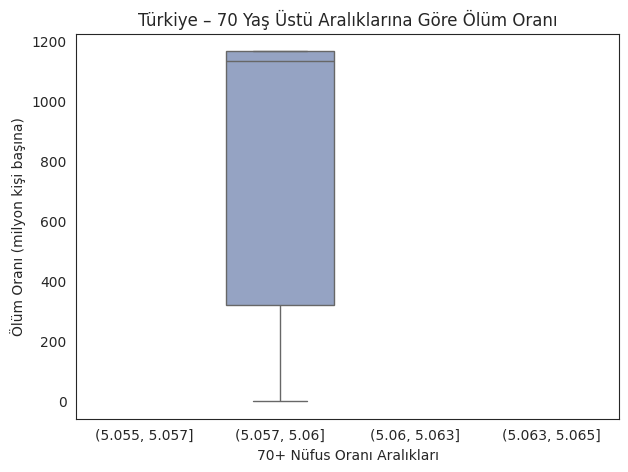

In [198]:
df_tr['aged_70_cat'] = pd.cut(df_tr['aged_70_older'], bins=4)

sns.set_style("white")
plt.figure(figsize=(7,5))
sns.boxplot(data=df_tr, x='aged_70_cat', y='total_deaths_per_million', color="#8da0cb")
plt.title("Türkiye – 70 Yaş Üstü Aralıklarına Göre Ölüm Oranı")
plt.xlabel("70+ Nüfus Oranı Aralıkları")
plt.ylabel("Ölüm Oranı (milyon kişi başına)")
plt.show()

###Türkiye – 70 Yaş Üstü Aralıklarına Göre Ölüm Oranı

**• Ortanca:** En yüksek yaş grubunda ortanca ölüm oranı 1150’ye yakındır.

**• Ortalama:** Ortalama ölüm oranı yaşlı nüfus oranı arttıkça yükseliyor gibi görünmektedir.

**• Dağılım:** En düşük yaş grubunda ölüm oranı neredeyse sıfır, diğer gruplarda yayılım geniştir.

- 70 yaş üstü nüfusun oranı arttıkça ölüm oranı da ciddi biçimde artmaktadır. Bu, yaşlı nüfusun pandemiden ne ölçüde etkilendiğini net şekilde gösterir.

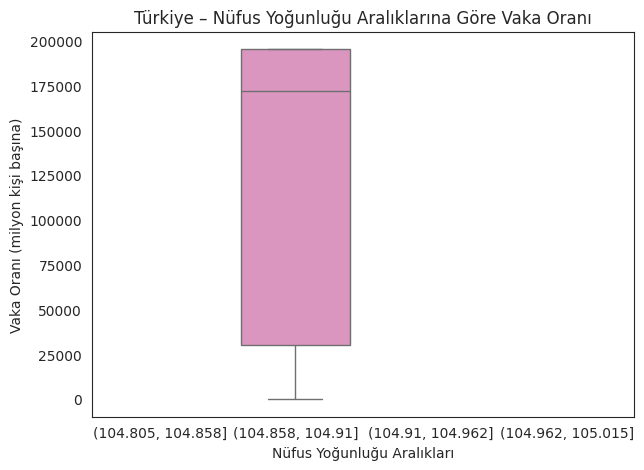

In [199]:
df_tr['pop_density_cat'] = pd.cut(df_tr['population_density'], bins=4)

sns.set_style("white")
plt.figure(figsize=(7,5))
sns.boxplot(data=df_tr, x='pop_density_cat', y='total_cases_per_million', color="#e78ac3")
plt.title("Türkiye – Nüfus Yoğunluğu Aralıklarına Göre Vaka Oranı")
plt.xlabel("Nüfus Yoğunluğu Aralıkları")
plt.ylabel("Vaka Oranı (milyon kişi başına)")
plt.show()

###Türkiye – Nüfus Yoğunluğu Aralıklarına Göre Vaka Oranı

**• Ortanca:** Nüfus yoğunluğu en yüksek grupta ortanca vaka oranı 200.000'e yakındır.

**• Ortalama:** Ortalama vaka oranı, nüfus yoğunluğu arttıkça belirgin şekilde yükselmektedir.

**• Dağılım:** En düşük yoğunluk grubunda vaka oranları çok daha düşük, en yüksek grupta ise yayılım geniştir.

- Türkiye'de nüfus yoğunluğu arttıkça vaka oranlarının da yükseldiği gözlenmektedir. Bu, kalabalık bölgelerde virüsün daha hızlı yayıldığını ve daha fazla kişiyi etkilediğini göstermektedir.

**65+ ve 70+ yaş nüfus oranı arttıkça**, ölüm oranlarının da belirgin şekilde arttığı gözlemlenmiştir. Bu durum, yaşlı nüfusun COVID-19 karşısında daha savunmasız olduğunu doğrular niteliktedir.
**Nüfus yoğunluğunun artması**, vaka oranlarında yükselişe neden olmaktadır. Daha kalabalık bölgelerde virüsün yayılma ihtimalinin artması beklenen bir durumdur.
**Ortanca yaş** değişkenine göre yapılan analizde ise, vaka oranlarının yüksek düzeyde seyrettiği ancak net bir eğilim göstermediği görülmektedir. Bunun nedeni, Türkiye genelinde ortanca yaşın çok dar bir aralıkta değişiyor olması olabilir.

Bu bulgular doğrultusunda, ileri yaş gruplarına yönelik sağlık önlemlerinin ve yoğun nüfuslu bölgelerdeki tedbirlerin önemi bir kez daha ortaya çıkmaktadır. Analiz, sınırlı örneklem üzerinden yapılsa da politika yapıcılar için yol gösterici olabilir.

#**Aşılama Analizi**

##**Dünya Genelinde Aşılama Trendi**

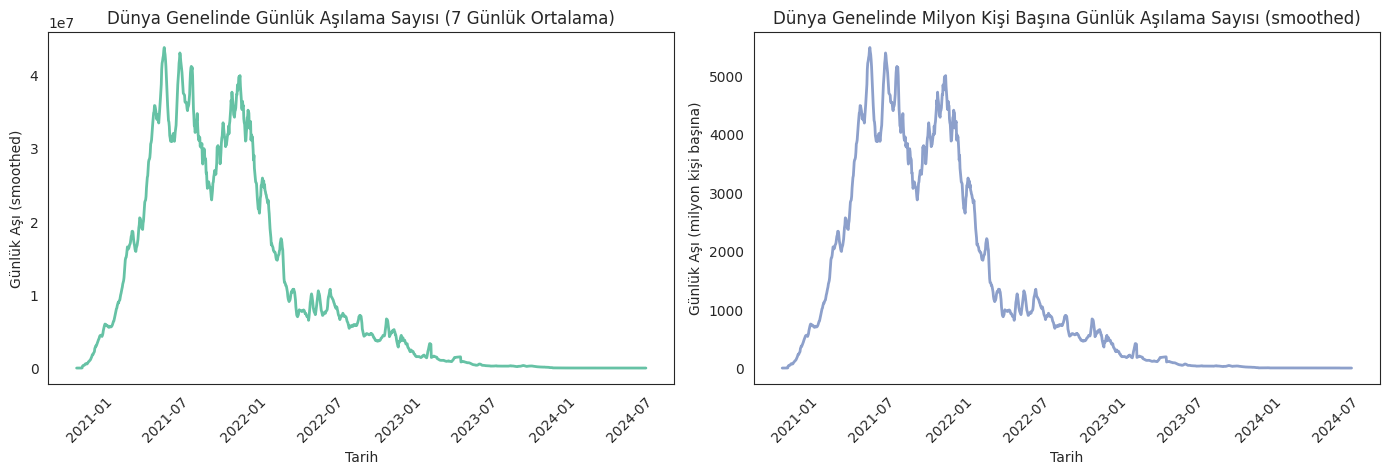

In [147]:
sns.set_style("white")

df['date'] = pd.to_datetime(df['date'])
df_world = df[df['location'] == 'World']

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_world, x='date', y='new_vaccinations_smoothed', color="#66c2a5", linewidth=2)
plt.title("Dünya Genelinde Günlük Aşılama Sayısı (7 Günlük Ortalama)")
plt.xlabel("Tarih")
plt.ylabel("Günlük Aşı (smoothed)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(data=df_world, x='date', y='new_vaccinations_smoothed_per_million', color="#8da0cb", linewidth=2)
plt.title("Dünya Genelinde Milyon Kişi Başına Günlük Aşılama Sayısı (smoothed)")
plt.xlabel("Tarih")
plt.ylabel("Günlük Aşı (milyon kişi başına)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### 1. Günlük Aşılama Sayısı (7 Günlük Ortalama)
- **Zirve Noktası:** Dünya genelinde günlük uygulanan aşı sayısı, 2021 ortalarında 40 milyona kadar yükselmiş, bu dönem aşılama kampanyalarının küresel çapta hızlandığı zamana denk gelir.
- **Hızlı Düşüş:** 2022 başından itibaren günlük aşı sayısında keskin bir düşüş gözlenmiş, bu da birçok ülkenin büyük oranda aşılamayı tamamlaması ve halkın ilgisinin azalmasıyla ilişkilendirilebilir.
- **Stabil Dönem:** 2023 ve sonrasında günlük aşılama oranı oldukça düşük ve yatay seyretmiştir.

#### 2. Milyon Kişi Başına Günlük Aşılama Sayısı (Smoothed)
- **Adil Karşılaştırma:** Milyon kişi başına normalize edilmiş bu metrik, ülkelerin nüfus farklarını dengeleyerek daha adil bir analiz sunar.
- **Benzer Eğilim:** Grafikteki eğilim, mutlak aşılama sayısıyla büyük ölçüde paralellik göstermekte; bu da aşılama oranlarının küresel olarak senkronize şekilde artıp azaldığını göstermektedir.
- **Düşük Seviye:** 2023 sonrası bu metrik de oldukça düşük seviyelerde sabitlenmiştir.

#### Genel Değerlendirme
- Aşılama faaliyetleri 2021'de pik yapmış, 2022 sonrası küresel ölçekte düşüşe geçmiştir.
- Pandeminin kontrol altına alınması, hatırlatma dozlarına olan düşük talep ve doğal bağışıklığın artması bu düşüşte etkili olmuştur.
- Son dönemlerde aşılama oranı dünya genelinde durağan hale gelmiştir.

##**Kıtalar Bazında Aşılama Trendleri**

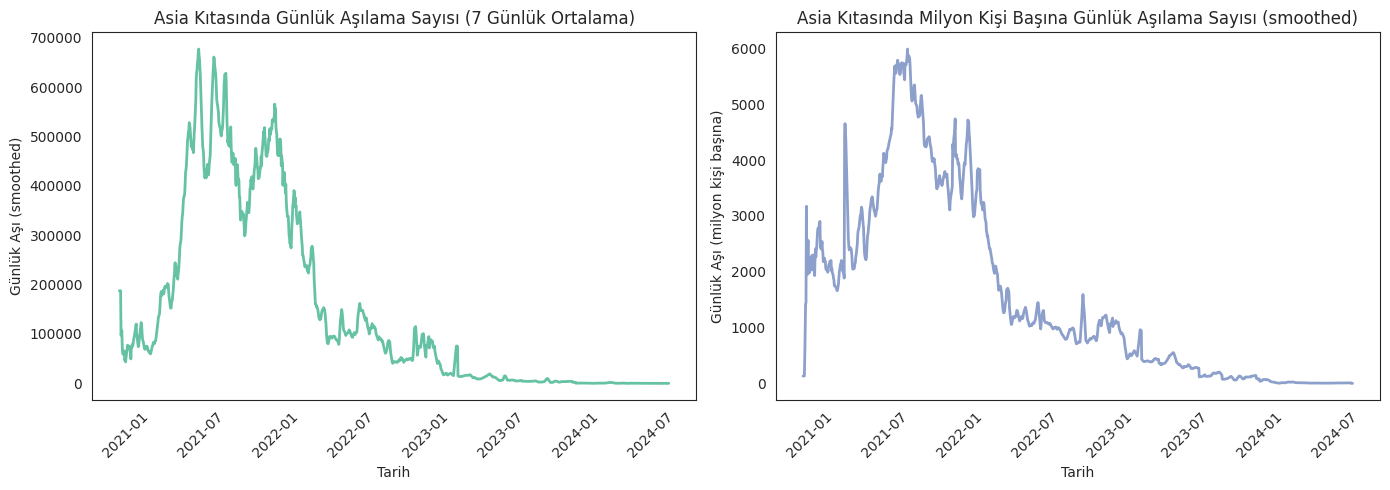

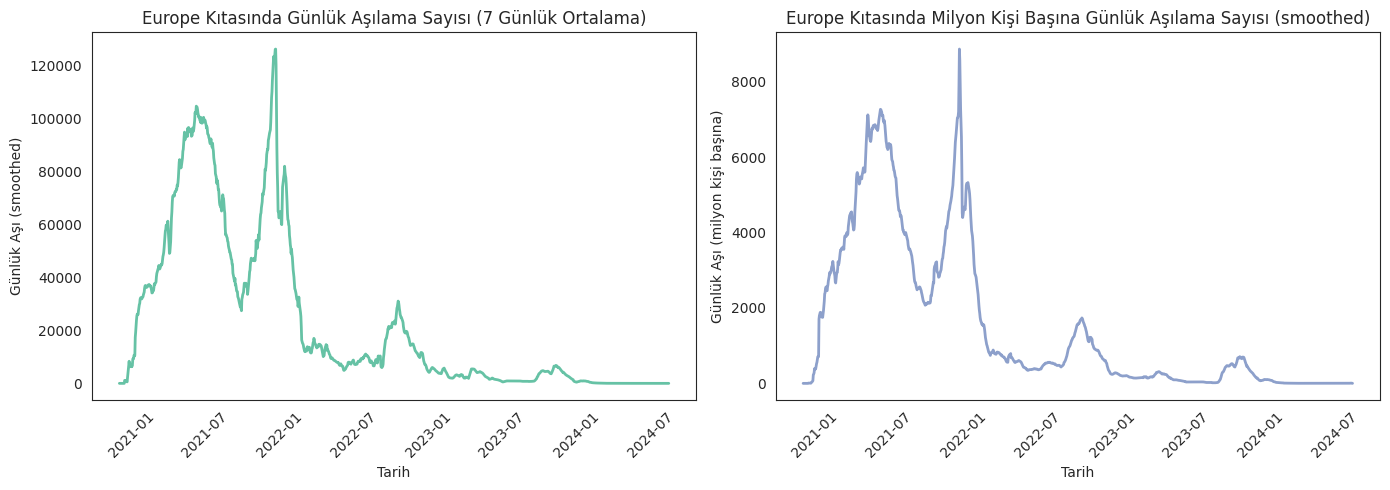

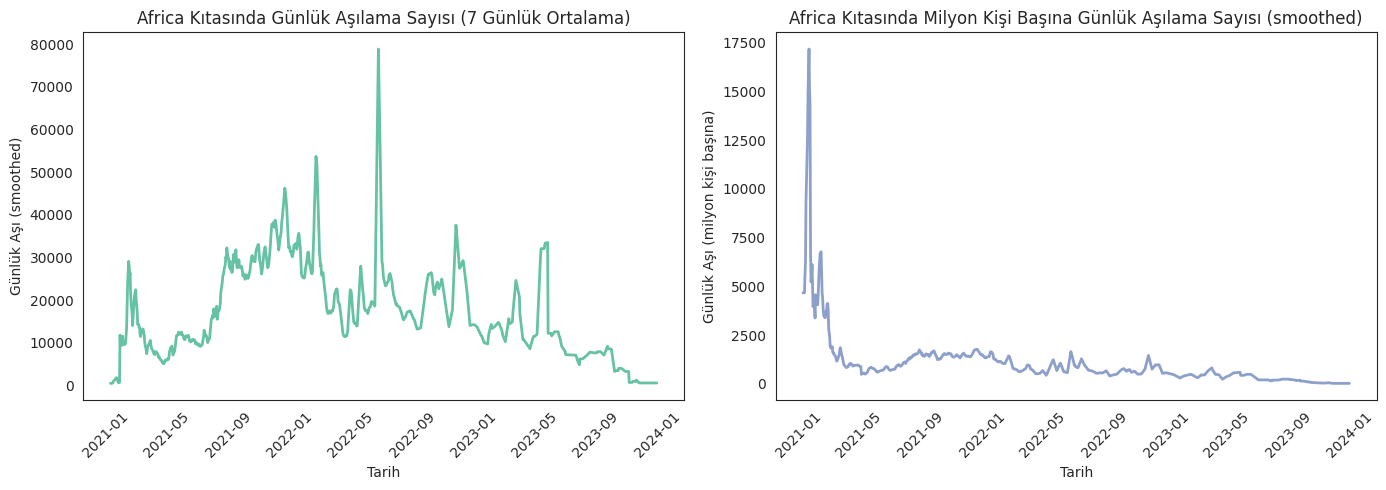

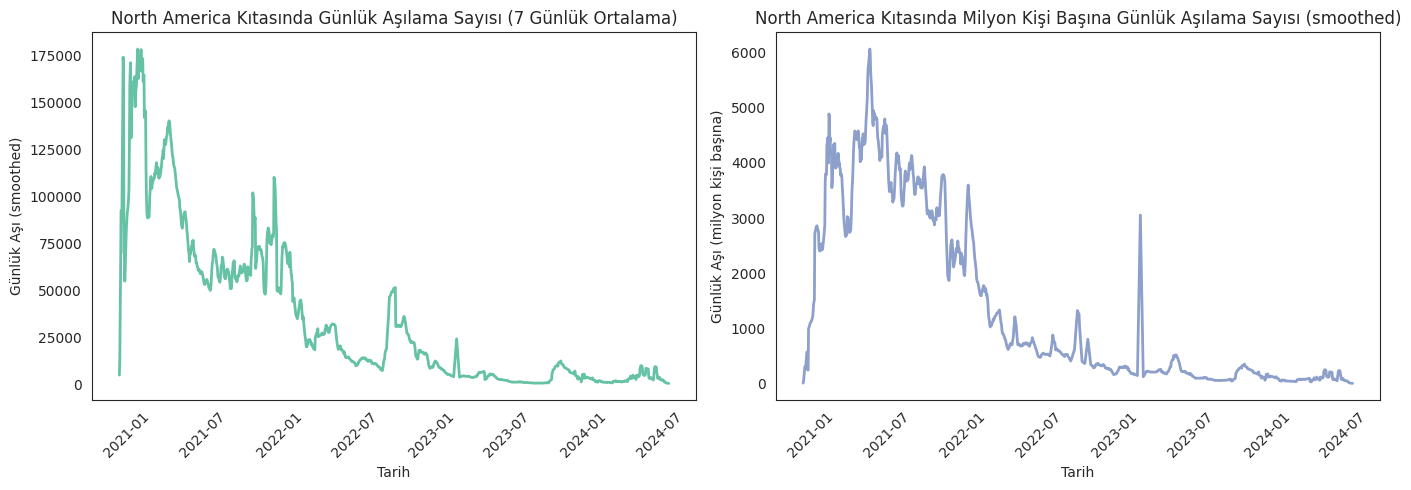

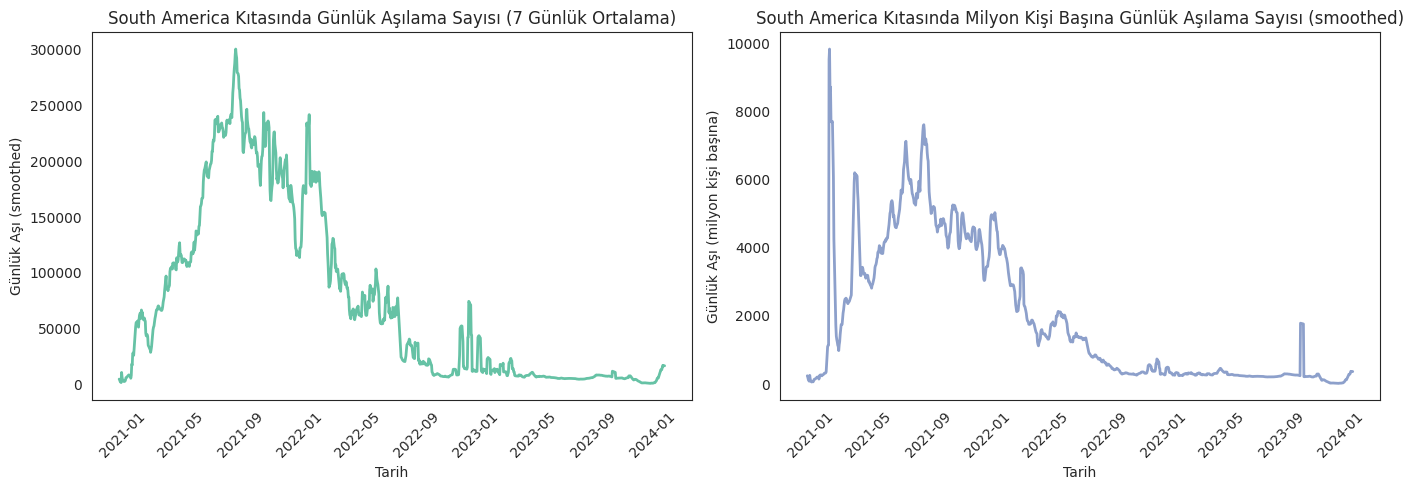

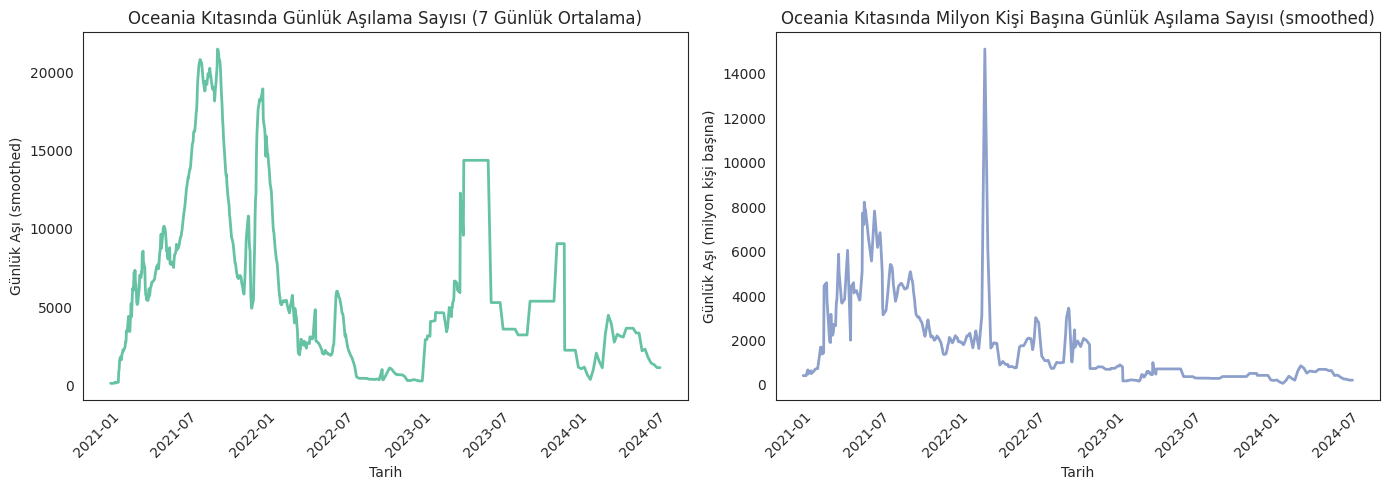

In [153]:
sns.set_style("white")

continents = ['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

for continent in continents:
    df_continent = df[df['continent'] == continent].copy()
    df_continent['date'] = pd.to_datetime(df_continent['date'])

    df_grouped = df_continent.groupby('date')[['new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million']].mean().reset_index()

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    sns.lineplot(data=df_grouped, x='date', y='new_vaccinations_smoothed', color="#66c2a5", linewidth=2)
    plt.title(f"{continent} Kıtasında Günlük Aşılama Sayısı (7 Günlük Ortalama)")
    plt.xlabel("Tarih")
    plt.ylabel("Günlük Aşı (smoothed)")
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    sns.lineplot(data=df_grouped, x='date', y='new_vaccinations_smoothed_per_million', color="#8da0cb", linewidth=2)
    plt.title(f"{continent} Kıtasında Milyon Kişi Başına Günlük Aşılama Sayısı (smoothed)")
    plt.xlabel("Tarih")
    plt.ylabel("Günlük Aşı (milyon kişi başına)")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

#### Asya (Asia)
- **Ortanca Değerler ve Zirve Dönemi**: Asya'da günlük aşılama sayısı 2021 ortasında zirveye ulaştı ve bu dönemde milyon kişi başına aşılama oranı 4000'in üzerindeydi.
- **Ortalama Eğilim**: Aşılama sayıları, 2022 başından itibaren belirgin şekilde azaldı ve 2023 itibarıyla düşük seviyelerde sabitlendi.
- **Dağılım ve Kararlılık**: Veriler dalgalanma gösterse de zirve sonrası düşüş oldukça düzenli.
- **İş Çıkarımı**: Aşıya hızlı erişim sağlandı ancak sürdürülebilir aşılama stratejisi uzun vadede azalttı. Erken aşamada güçlü bir aşılama kampanyası yürütüldüğü söylenebilir.

---

#### Avrupa (Europe)
- **Ortanca Değerler ve Zirve Dönemi**: Avrupa, 2021 ortasında yüksek oranlarda günlük aşılama yaptı; kişi başına oran 5000'e kadar çıktı.
- **Ortalama Eğilim**: 2022’den itibaren aşılama oranlarında düşüş görülüyor, 2023 itibarıyla sabit düşük seviyelere geriledi.
- **Dağılım ve Kararlılık**: Aşılama verileri düzenli; belirgin bir dalga ve ardından uzun vadeli azalma var.
- **İş Çıkarımı**: Avrupa ülkeleri hızlı aşılamayı erken dönemde başarıyla tamamladı ve sonrasında hızla normalleşmeye geçti.

---

#### Afrika (Africa)
- **Ortanca Değerler ve Zirve Dönemi**: Afrika’da aşılama oranları diğer kıtalara kıyasla oldukça düşük kaldı; milyon kişi başına günlük aşı 500'ün altında seyretti.
- **Ortalama Eğilim**: Geç başlayan aşılama kampanyaları 2022’de bir miktar artış gösterse de hiçbir zaman yüksek seviyelere ulaşamadı.
- **Dağılım ve Kararlılık**: Veri dağılımı genel olarak düşük ve sınırlı sayıda ani artış içeriyor.
- **İş Çıkarımı**: Aşıya erişim eşitsizliği ve altyapı sorunları nedeniyle Afrika'da yaygın ve hızlı aşılama sağlanamadı.

---

#### Kuzey Amerika (North America)
- **Ortanca Değerler ve Zirve Dönemi**: 2021’in ilk yarısında en yüksek aşılama oranları görüldü; milyon kişi başına 6000’in üzerinde günlük aşılama gerçekleşti.
- **Ortalama Eğilim**: 2022’den itibaren dramatik bir azalma var, 2023 sonrası neredeyse sıfıra yakın.
- **Dağılım ve Kararlılık**: Çok düzenli ve güçlü bir ilk aşılama dalgası gözlemleniyor.
- **İş Çıkarımı**: ABD ve Kanada gibi ülkelerde aşılama erken ve organize şekilde yapıldı, sonra hızla durduruldu.

---

#### Güney Amerika (South America)
- **Ortanca Değerler ve Zirve Dönemi**: Zirve döneminde günlük aşılama oranları Avrupa’ya benzer seviyelere ulaştı (4000 civarı).
- **Ortalama Eğilim**: 2022’de düşüşe geçti, ancak Afrika’ya göre daha yüksek seviyelerde tutundu.
- **Dağılım ve Kararlılık**: Aşılama kampanyası zaman içinde dengeli yürütüldü.
- **İş Çıkarımı**: Kaynaklara rağmen aşılama oranları yüksek tutuldu; çoğu ülke toplu bağışıklığa ulaşmayı hedefledi.

---

#### Okyanusya (Ocenia)
- **Ortanca Değerler ve Zirve Dönemi**: Milyon kişi başına aşılama oranı 6000’in üzerine çıkabildi.
- **Ortalama Eğilim**: 2022 başlarında hızla düşüşe geçildi, 2023 boyunca oldukça düşük seyretti.
- **Dağılım ve Kararlılık**: Ani yükselme ve hızlı azalma gözlemlendi; küçük nüfusun etkisiyle veriler daha keskin.
- **İş Çıkarımı**: Aşılamada başarı sağlandı ancak sürdürülebilirlik düşük kaldı. Küçük nüfus nedeniyle kampanyalar kısa sürdü.

---

##**Türkiye Aşılama Trendi**

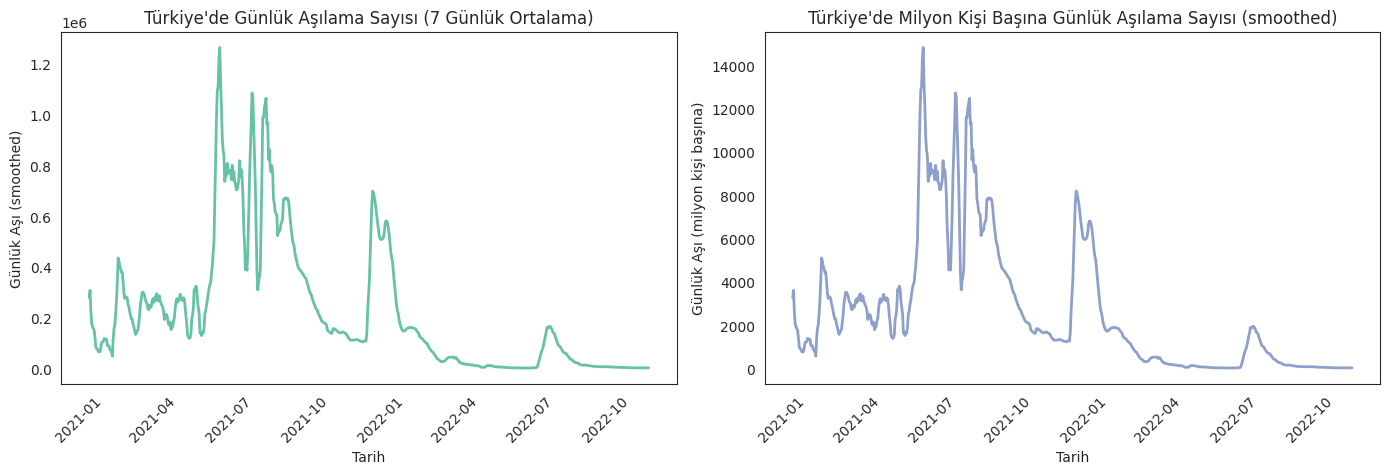

In [160]:
sns.set_style("white")

df_turkey = df[df['location'] == 'Turkey'].copy()
df_turkey['date'] = pd.to_datetime(df_turkey['date'])

df_grouped = df_turkey.groupby('date')[['new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million']].mean().reset_index()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_grouped, x='date', y='new_vaccinations_smoothed', color="#66c2a5", linewidth=2)
plt.title("Türkiye'de Günlük Aşılama Sayısı (7 Günlük Ortalama)")
plt.xlabel("Tarih")
plt.ylabel("Günlük Aşı (smoothed)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(data=df_grouped, x='date', y='new_vaccinations_smoothed_per_million', color="#8da0cb", linewidth=2)
plt.title("Türkiye'de Milyon Kişi Başına Günlük Aşılama Sayısı (smoothed)")
plt.xlabel("Tarih")
plt.ylabel("Günlük Aşı (milyon kişi başına)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**1. Ortanca & Ortalama Değerler:**
- **Günlük Aşı Sayısı (7 Günlük Ortalama):** En yüksek seviyeye Haziran–Temmuz 2021 döneminde ulaşıldı (1.2 milyona yakın). Bu, aşılama kampanyalarının yoğunlaştığı ve halkın erişiminin arttığı döneme işaret eder.
- **Milyon Kişi Başına Aşı Sayısı:** Aynı dönemde kişi başına düşen aşılama oranı da zirve yaptı (14.000'in üzerine çıkarak).

**2. Dağılım:**
- Her iki grafik de, 2021 ortalarında ani bir yükselişin ardından 2022 itibarıyla belirgin bir düşüş olduğunu göstermektedir.
- 2022’nin ikinci yarısından itibaren günlük aşı sayısı neredeyse sabitlenmiş ve oldukça düşük seviyelerde kalmıştır.

**3. Çıkarımlar:**
- Türkiye’de aşılamada en büyük atılım 2021 yazında gerçekleşmiş; bu süreçte toplumun büyük bir kısmı aşılanmıştır.
- 2022 itibarıyla aşı ihtiyacının azalması, halkın çoğunluğunun bağışıklık kazanmış olması ya da talebin düşmesi gibi nedenlerle aşılama hızla azalmıştır.
- Kişi başına düşen aşılama verileri, toplumun yüksek oranlarda aşılandığını desteklemektedir.

**Not:** Grafiklerin sağlıklı yorumlanabilmesi için dönemsel politikalar, varyant dalgaları ve aşılama kampanyalarının incelenmesi önerilir.

### Türkiye'de Aşılama Süreci: Genel Değerlendirme

Türkiye'nin COVID-19 aşılama süreci incelendiğinde, en yoğun aşılama döneminin 2021 yılının yaz aylarında gerçekleştiği görülmektedir. Gerek günlük aşılama sayılarında gerekse milyon kişi başına düşen doz sayılarında bu dönemde ciddi artışlar yaşanmıştır. Bu, aşıların geniş kitlelere ulaştığı ve toplum genelinde bağışıklık oluşturma çabasının yoğunlaştığı bir zaman aralığını yansıtmaktadır.

2022 yılından itibaren her iki göstergede de belirgin bir düşüş gözlemlenmektedir. Bu düşüşün başlıca nedenleri arasında aşıya olan talebin azalması, büyük oranda bağışıklık kazanılmış olması, hatırlatma dozlarının sınırlı kitlelere uygulanması ve toplumun aşılama motivasyonundaki azalma sayılabilir.

Sonuç olarak, Türkiye’de aşılama süreci pandeminin kontrol altına alınmasında etkili bir araç olmuş, özellikle 2021 yılında yapılan yoğun aşılamalar sayesinde toplumsal koruyuculuk sağlanmıştır. Ancak sonraki dönemlerdeki düşüş, sürdürülebilir aşılama politikalarının önemini ortaya koymaktadır.

##**Sonuç: COVID-19 Pandemisi Süresince Aşılama, Vaka ve Ölüm Oranları Üzerine Genel Değerlendirme**

Bu çalışma kapsamında, Our World in Data COVID-19 veri seti kullanılarak dünya genelinde, kıtalar bazında ve Türkiye özelinde vaka, ölüm ve aşılama oranları derinlemesine incelenmiştir. Elde edilen bulgular şu şekilde özetlenebilir:

### 1. Dünya Genelinde Gözlemler
- **Vaka ve ölüm oranları zaman içinde belirgin dalgalanmalar göstermiş**, özellikle 2020 sonları ve 2021 başlarında hızlı artışlar yaşanmıştır.
- **Aşılama kampanyalarının başlamasıyla birlikte** birçok ülkede hem **vaka hem de ölüm oranlarında belirgin bir yavaşlama** gözlenmiştir.
- **Milyon kişi başına düşen vaka ve ölüm oranları** ülkeler arası büyük farklılıklar göstermektedir. Boxplot analizleri, bu dağılımın bazı ülkelerde aşırı yüksek değerlere sahip olduğunu ortaya koymuştur.

### 2. Kıtalar Bazında Bulgular
- **Avrupa ve Kuzey Amerika**, vaka ve ölüm oranlarında ilk sıralarda yer almakta, ancak aynı zamanda **aşılama oranlarında da en yüksek değerlere** ulaşmaktadır.
- **Afrika ve Asya**, genellikle daha düşük vaka ve ölüm oranlarına sahip görünse de, bu durumun **test sayısının azlığı, veri eksikliği veya genç nüfus yapısından** kaynaklanabileceği düşünülmektedir.
- **Okyanusya** kıtası, en düşük ölüm oranlarını sergilemiş ve vaka artışını genelde kontrol altında tutmuştur.
- Aşılama oranı arttıkça, kıta genelinde **ölüm oranlarında düşüş eğilimi** görülmektedir; ancak bu etkinin düzeyi, **sağlık altyapısı ve demografik yapılarla da doğrudan ilişkilidir**.

### 3. Türkiye Özelinde Gözlemler
- Türkiye’de **vakaların milyon kişi başına düşen oranı** oldukça yüksektir, ancak ölüm oranı bazı Avrupa ülkelerine kıyasla daha düşüktür.
- **Aşılama süreci özellikle 2021 yazından itibaren ivme kazanmış**, milyon kişi başına düşen günlük aşı sayıları belirli dönemlerde oldukça yüksek seviyelere ulaşmıştır.
- **Ortalama yaş**, **65+ ve 70+ yaş oranları**, ve **nüfus yoğunluğu** gibi demografik değişkenler incelendiğinde; yaşlı nüfus oranı arttıkça ölüm oranlarında da artış gözlenmiştir.
- Türkiye’de **65 yaş üstü nüfusun artışıyla beraber ölüm oranının yükselmesi**, aşılama stratejilerinde yaşlı grupların önceliklendirilmesinin ne kadar doğru bir adım olduğunu doğrulamaktadır.

### 4. Genel Değerlendirme
- **Aşılamanın COVID-19 üzerindeki etkisi küresel düzeyde pozitif yöndedir**: Aşı oranları arttıkça ölüm oranlarının düştüğü birçok ülkede ve kıtada gözlemlenmiştir.
- Bununla birlikte, **veri kalitesi**, **test sayıları**, **sağlık altyapısı**, **halkın aşıya yaklaşımı** ve **demografik yapı** gibi unsurlar, bu ilişkinin derecesini ve görünürlüğünü etkilemektedir.
- **Türkiye**, aşılamayı belirli dönemlerde etkin bir şekilde yürütmüş ve bu sayede özellikle ölüm oranlarında kontrol sağlayabilmiştir.
- Sonuç olarak, **aşılamanın sadece bireysel değil, toplumsal düzeyde de koruyucu bir etkisi** olduğu açıkça görülmektedir.